In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
# %qtconsole

In [2]:
from glob import glob
import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr

from src.parameters import PROCESSED_DATA_DIR, STATE_COLORS, STATE_ORDER

import logging
logging.basicConfig(level=logging.INFO)

In [3]:
import matplotlib
import seaborn as sns

from src.parameters import FIGURE_DIR

# Set background and fontsize
rc_params = {
    'pdf.fonttype': 42, # Make fonts editable in Adobe Illustrator
    'ps.fonttype': 42, # Make fonts editable in Adobe Illustrator
    'axes.labelcolor': '#222222',
    'text.color': '#222222',
    'figure.figsize': (7.2, 4.45),
    'font.sans-serif' : 'Helvetica',
    'text.usetex': False,
    'xtick.major.size': 0.00,
    'ytick.major.size': 0.00,
    'axes.labelpad': 0.1,
    }
sns.set(style='white', context='poster', rc=rc_params)

In [4]:
def save_figure(figure_name, is_save_figures=True):
    if is_save_figures:
        figure_name = os.path.join(FIGURE_DIR, figure_name)
        plt.savefig(figure_name + '.pdf', transparent=True, dpi=300, bbox_inches='tight')

In [5]:
data_type, dim = 'clusterless', '1D'
n_unique_spiking = 2

file_paths = glob(os.path.join(PROCESSED_DATA_DIR, f'*_{data_type}_{dim}_replay_info.csv'))
replay_info = (pd.concat(
                 [pd.read_csv(file_path) for file_path in file_paths], axis=0)
               .set_index(['animal', 'day', 'epoch', 'ripple_number']))
replay_info = replay_info.loc[replay_info.n_unique_spiking >= n_unique_spiking]

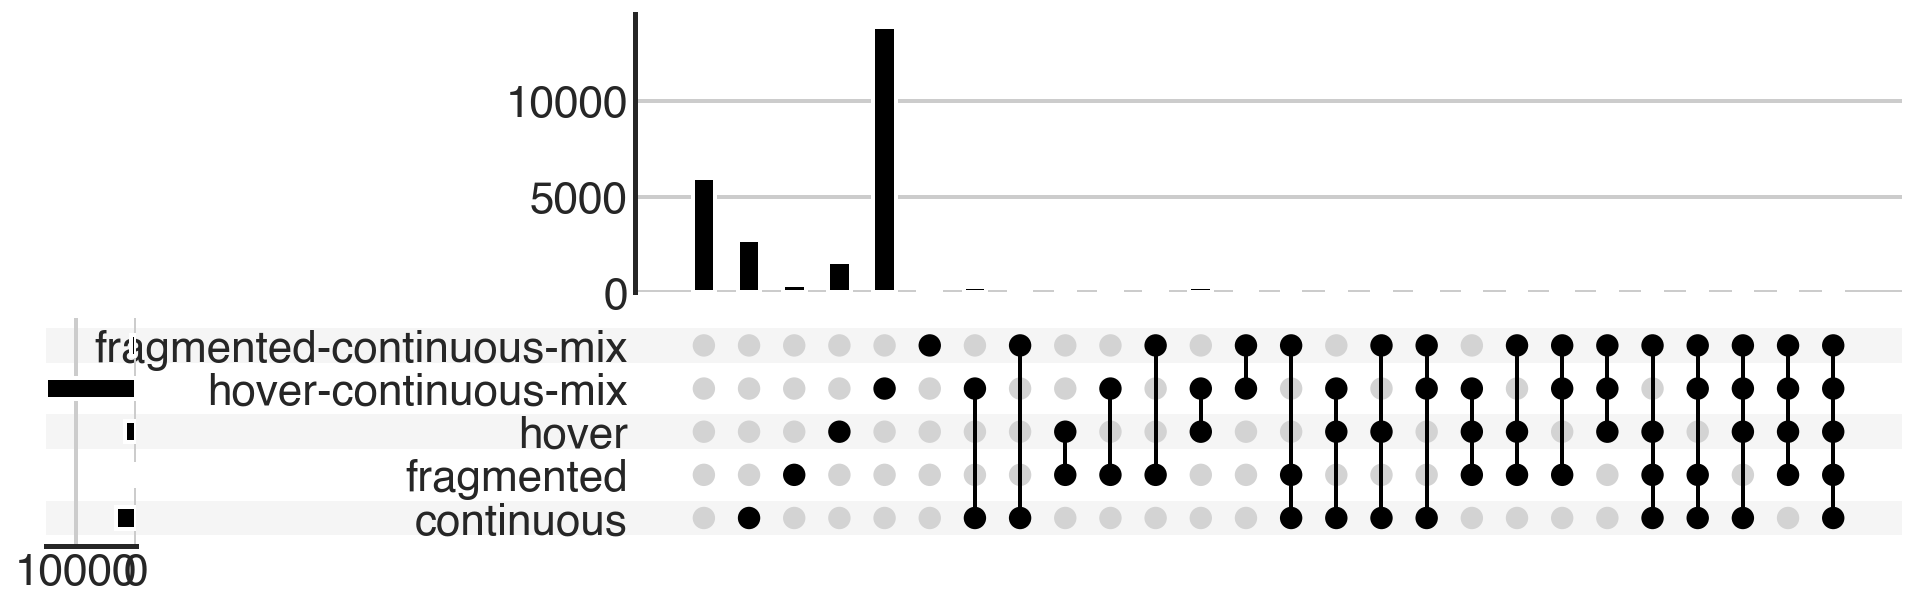

In [6]:
from src.visualization import plot_category_counts

plot_category_counts(replay_info);

save_figure('category_counts')

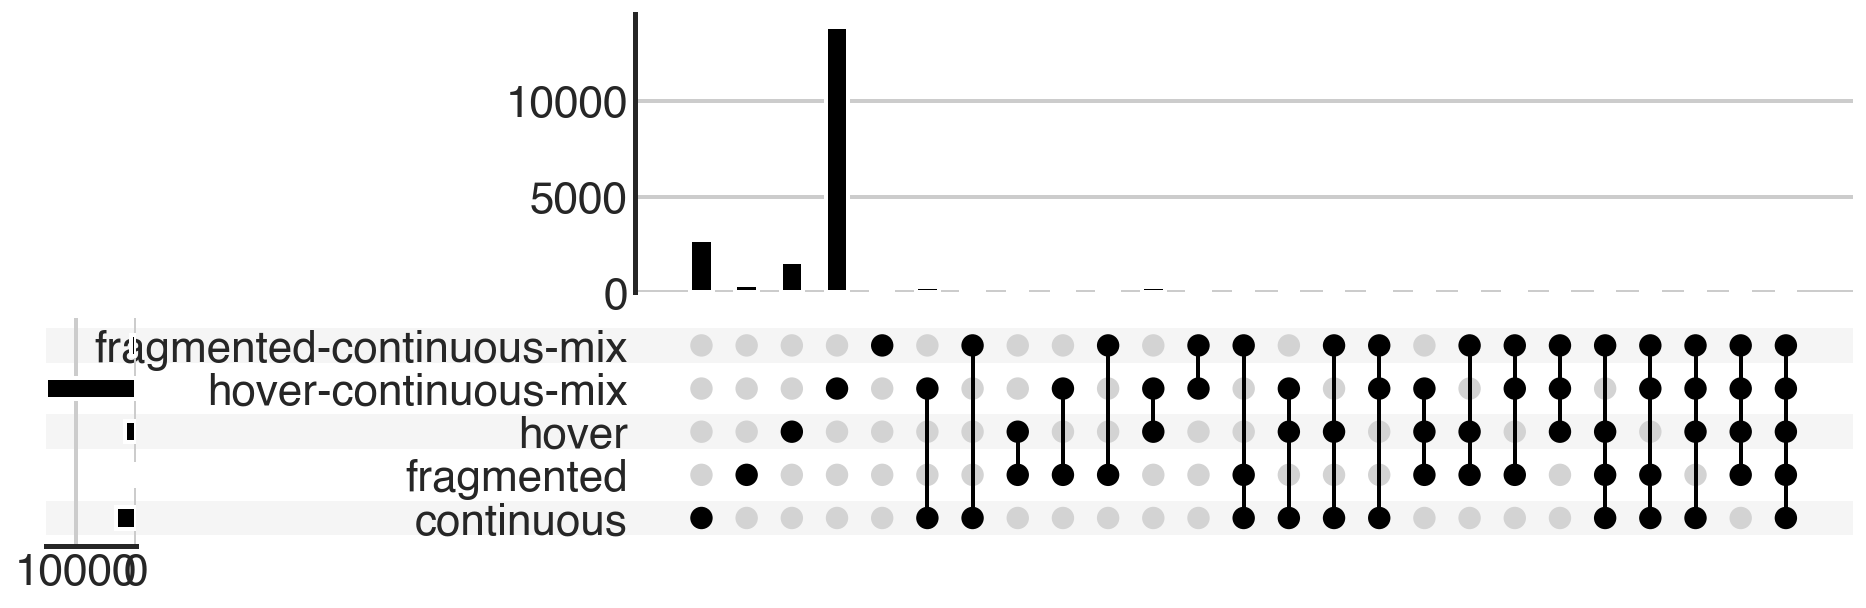

In [7]:
plot_category_counts(replay_info.loc[replay_info.is_classified]);

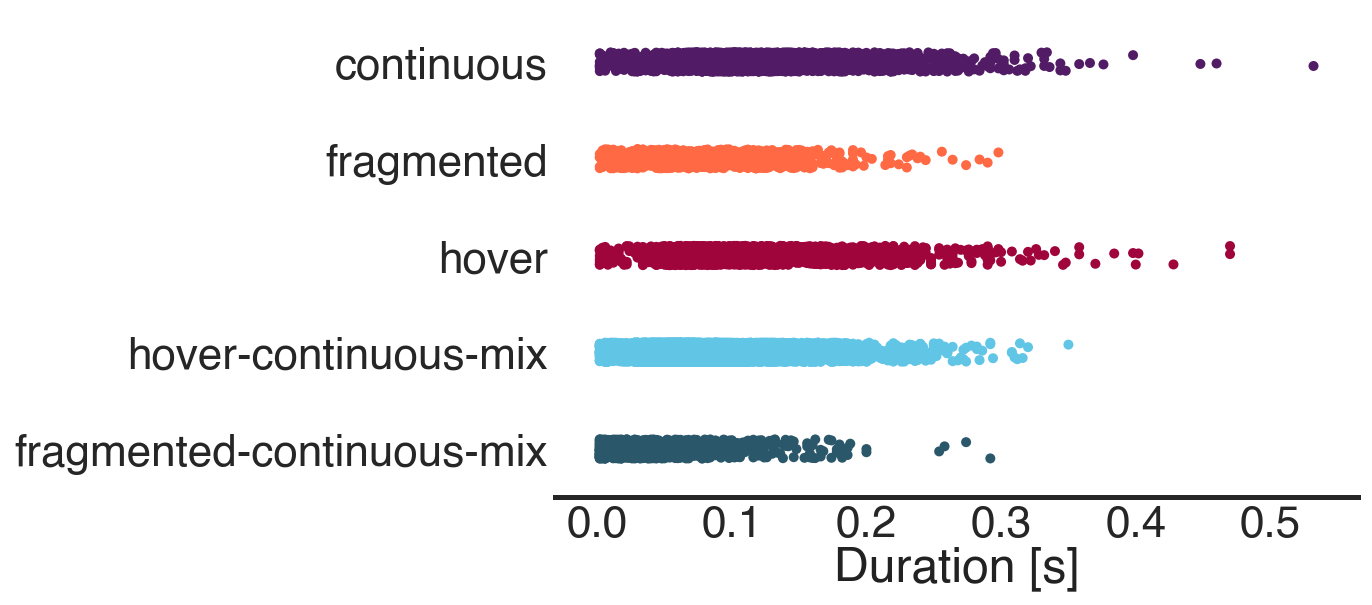

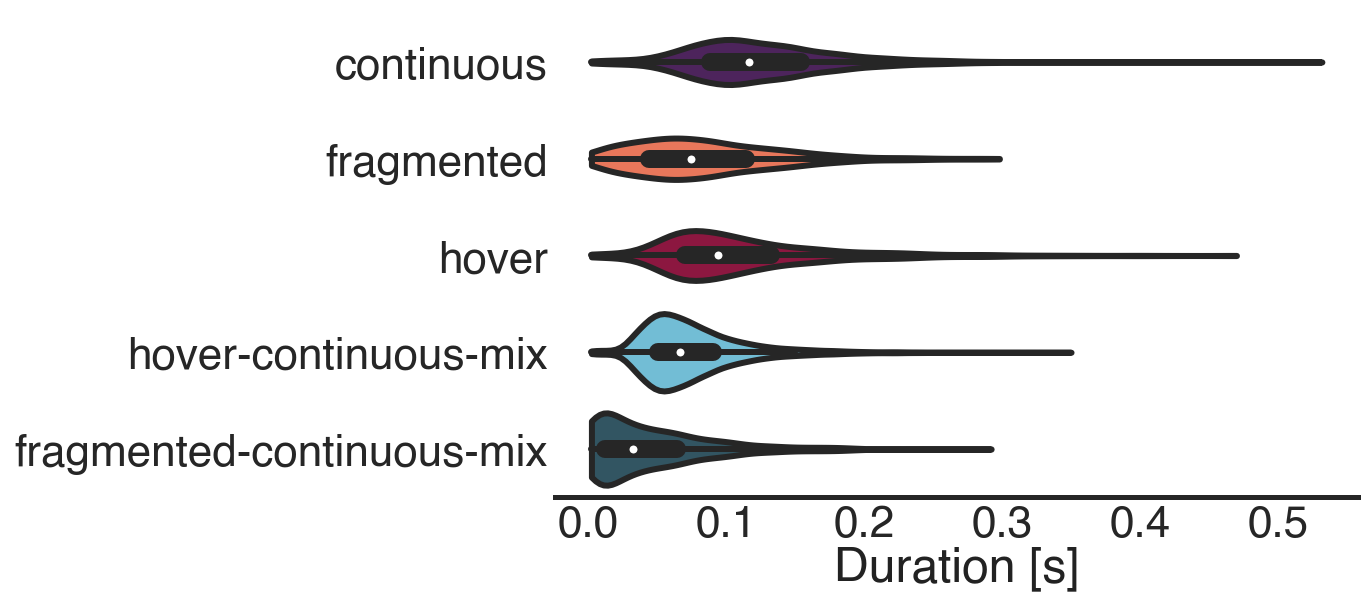

In [8]:
from src.visualization import plot_category_duration

plt.figure()
plot_category_duration(replay_info)

plt.figure()
plot_category_duration(replay_info, kind='violin')
save_figure('category_duration')

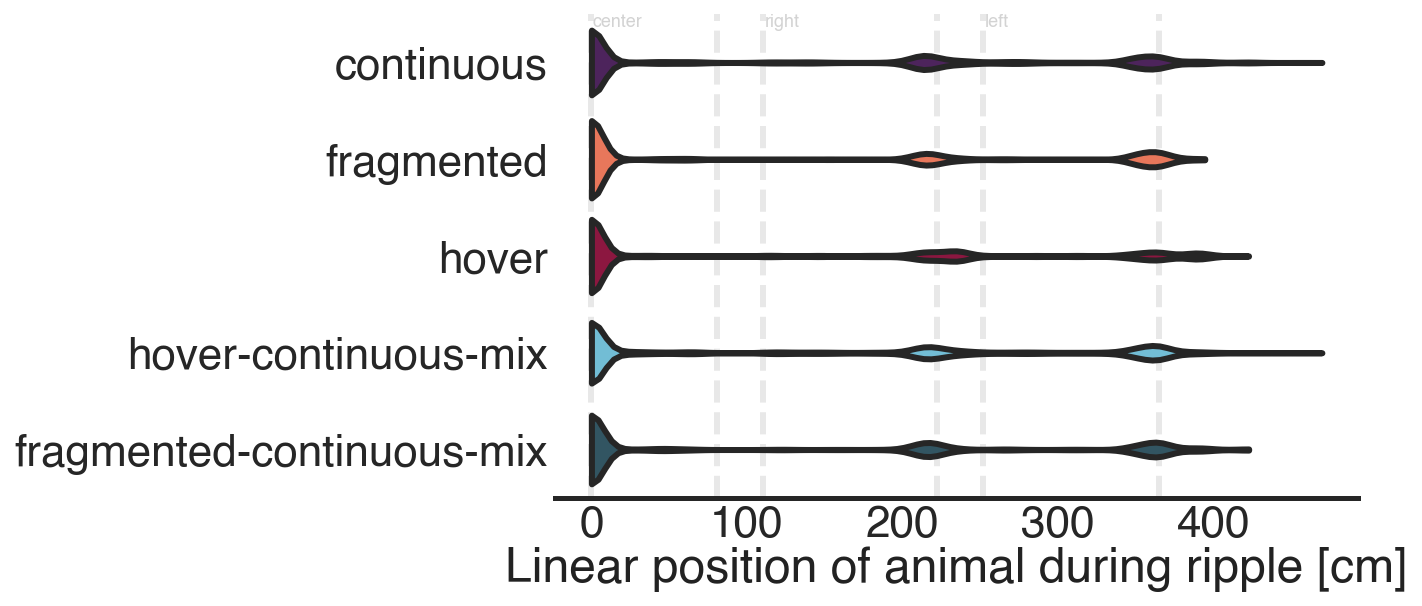

In [9]:
from src.visualization import plot_linear_position_of_animal

plot_linear_position_of_animal(replay_info)

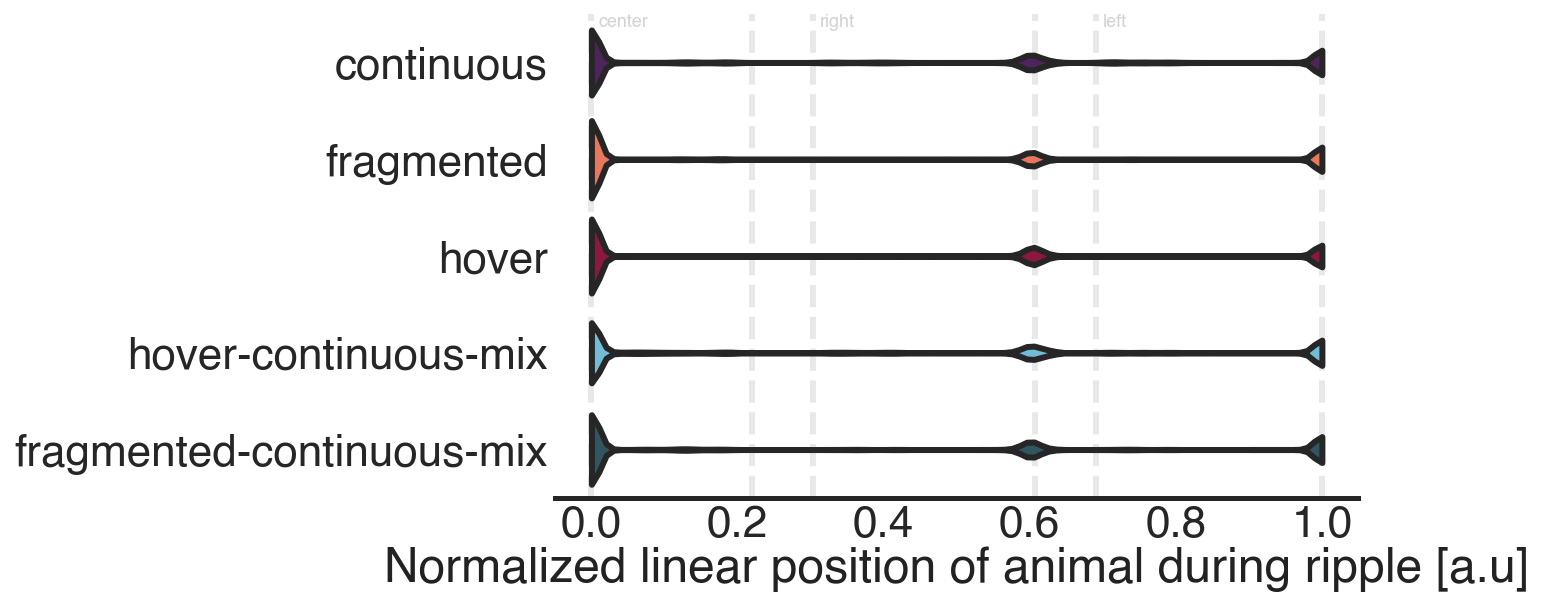

In [10]:
from src.visualization import plot_normalized_linear_position_of_animal

plot_normalized_linear_position_of_animal(replay_info)

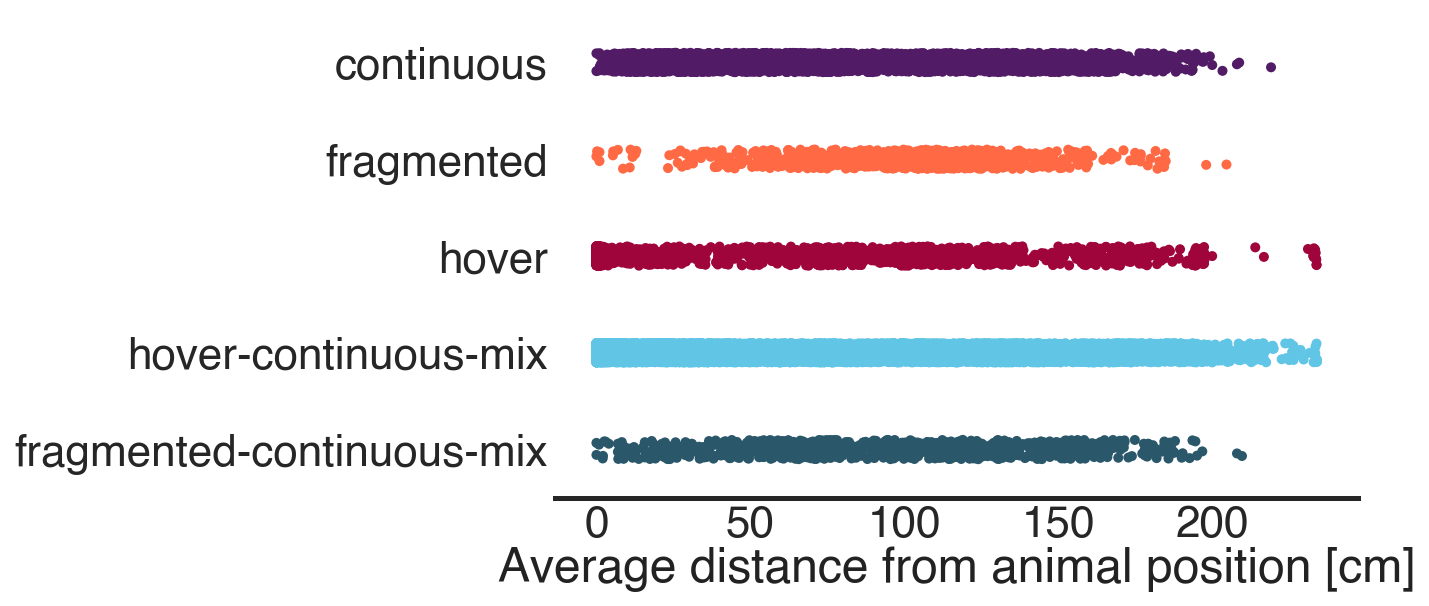

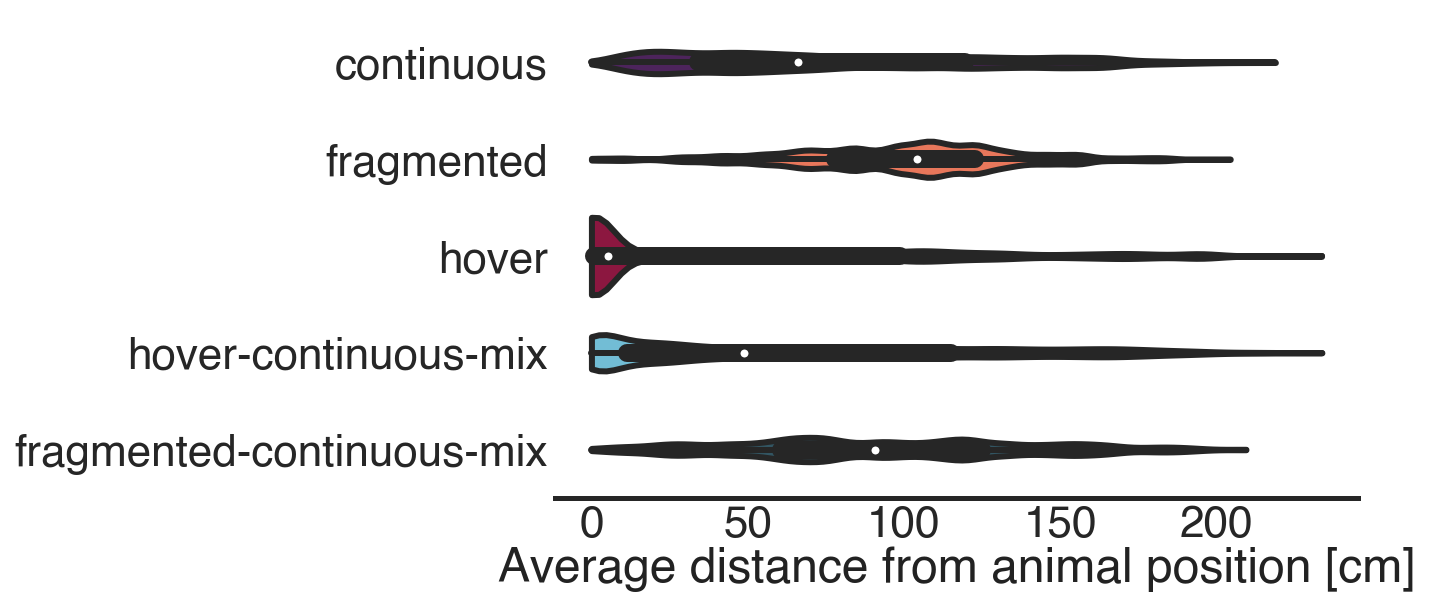

In [11]:
from src.visualization import plot_replay_distance_from_actual_position

plt.figure()
plot_replay_distance_from_actual_position(replay_info)

plt.figure()
plot_replay_distance_from_actual_position(replay_info, kind='violin', bw=0.1)
save_figure('average_replay_distance_from_animal')

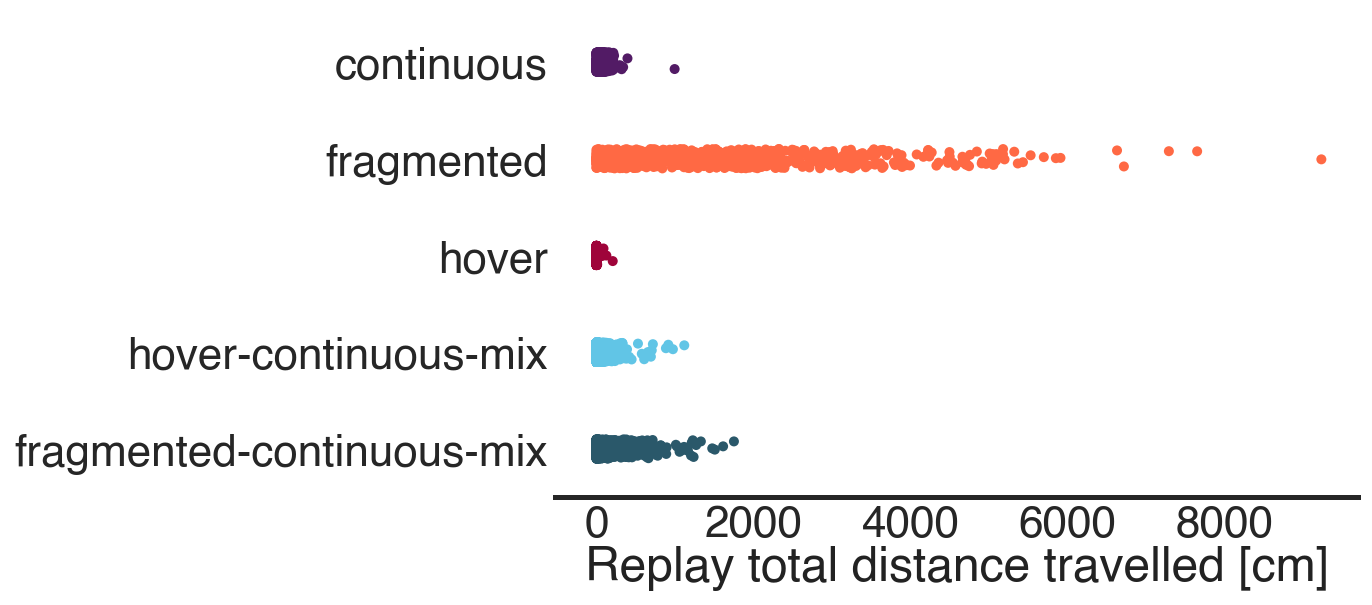

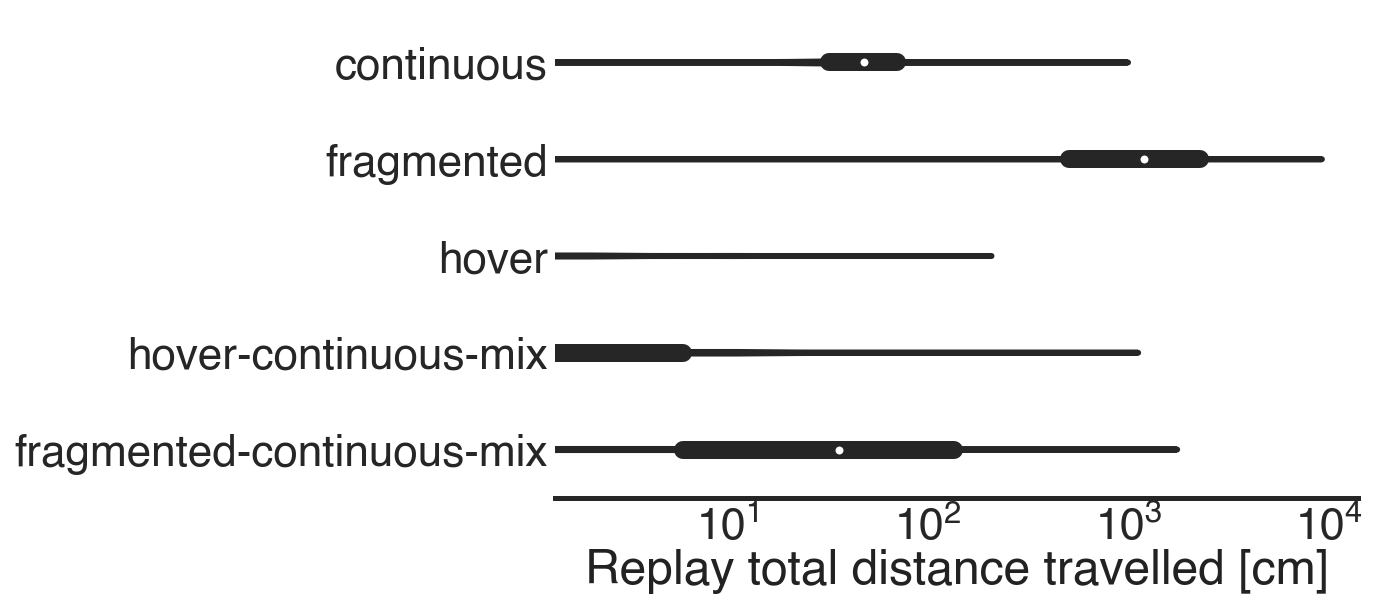

In [12]:
from src.visualization import plot_replay_total_distance

plt.figure()
plot_replay_total_distance(replay_info)

plt.figure()
plot_replay_total_distance(replay_info, kind='violin', bw=0.1)
save_figure('replay_total_distance_traveled')

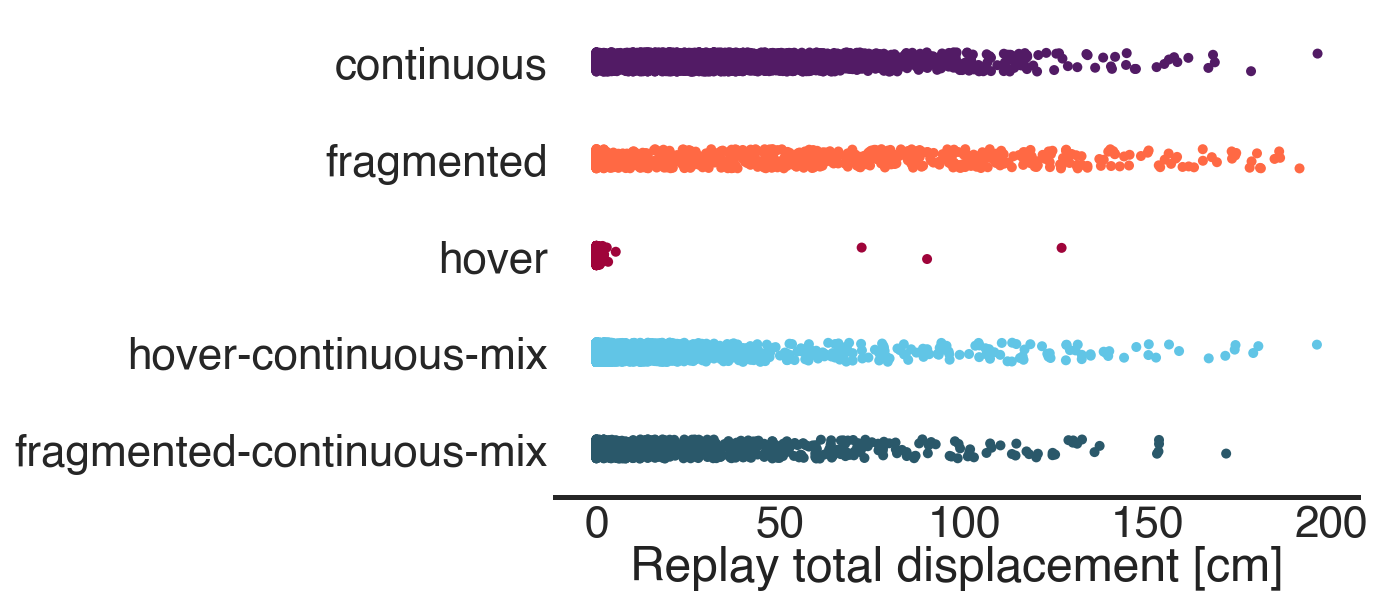

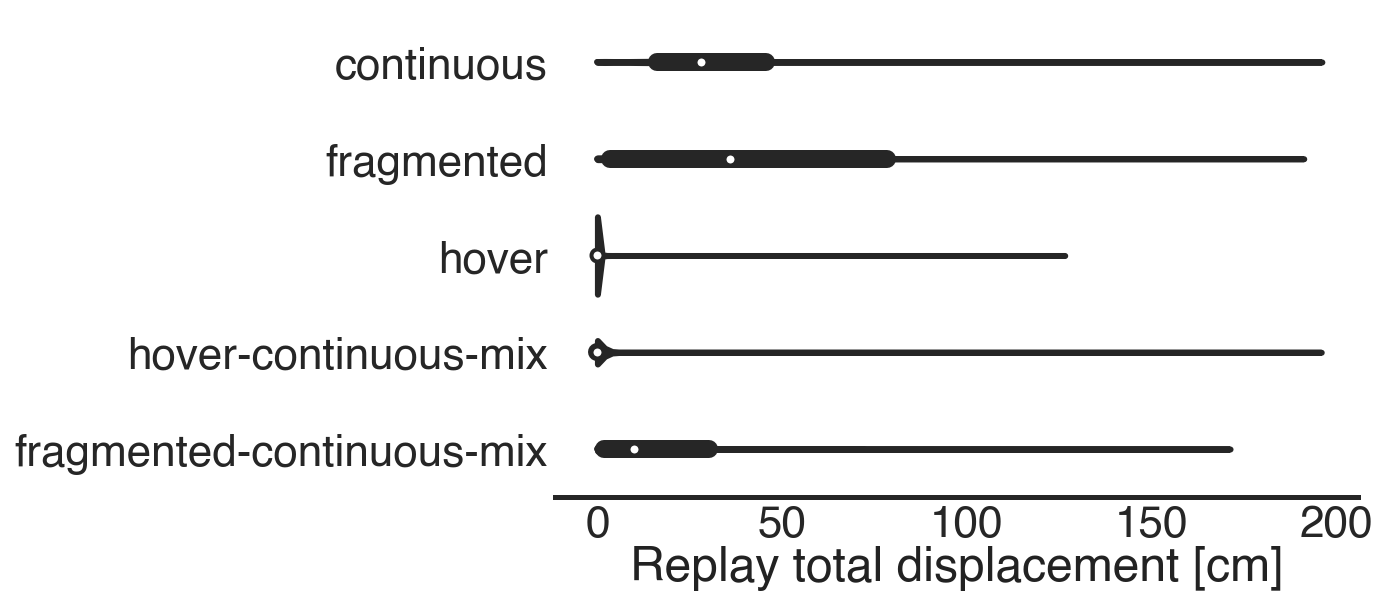

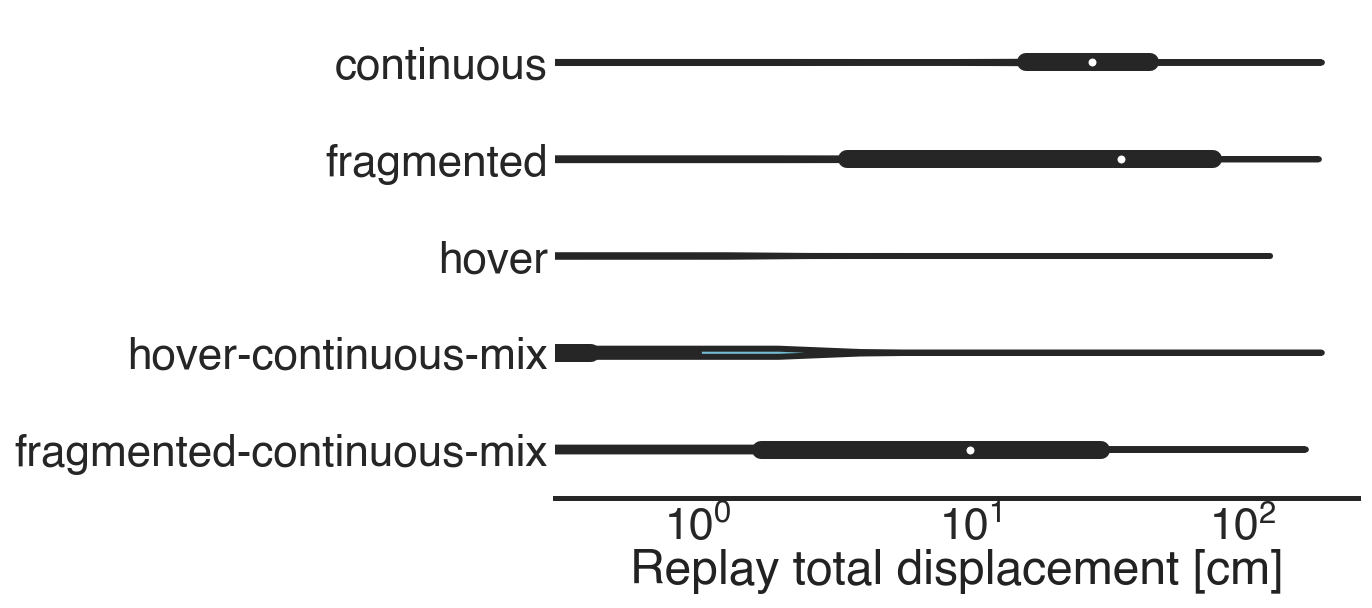

In [13]:
from src.visualization import plot_replay_total_displacement

plt.figure()
plot_replay_total_displacement(replay_info, kind='strip')


plt.figure()
plot_replay_total_displacement(replay_info, kind='violin', bw=0.1)

plt.figure()
plot_replay_total_displacement(replay_info, kind='violin', bw=0.1)
plt.gca().set_xscale('log')

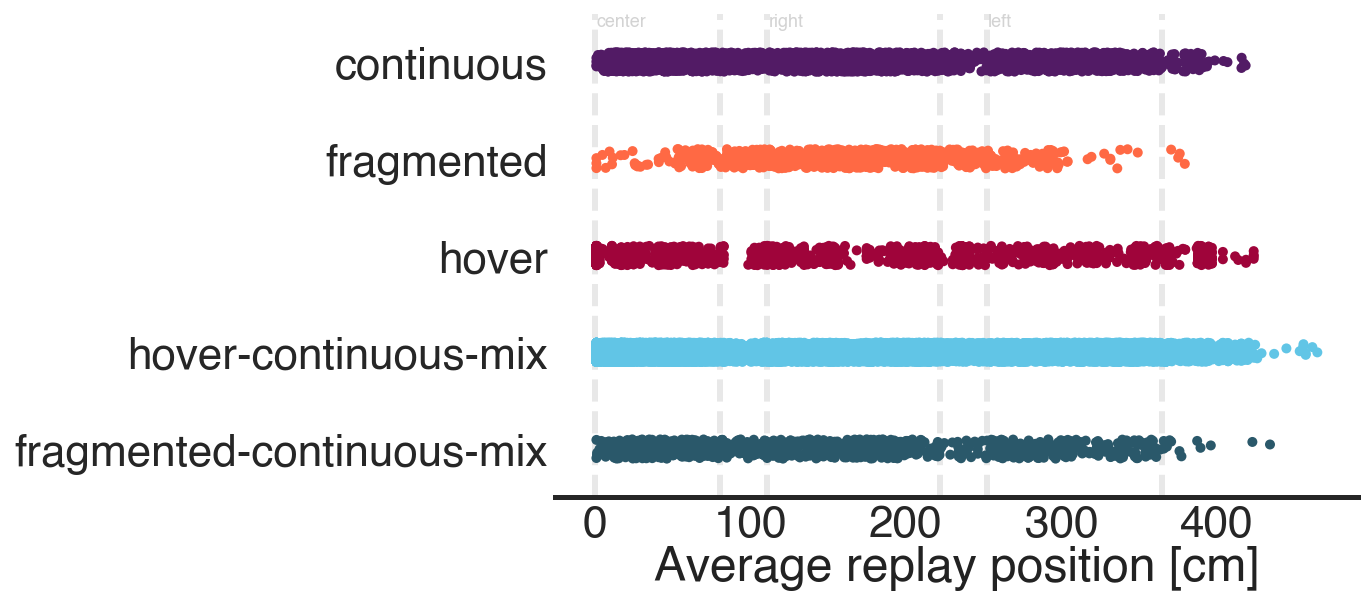

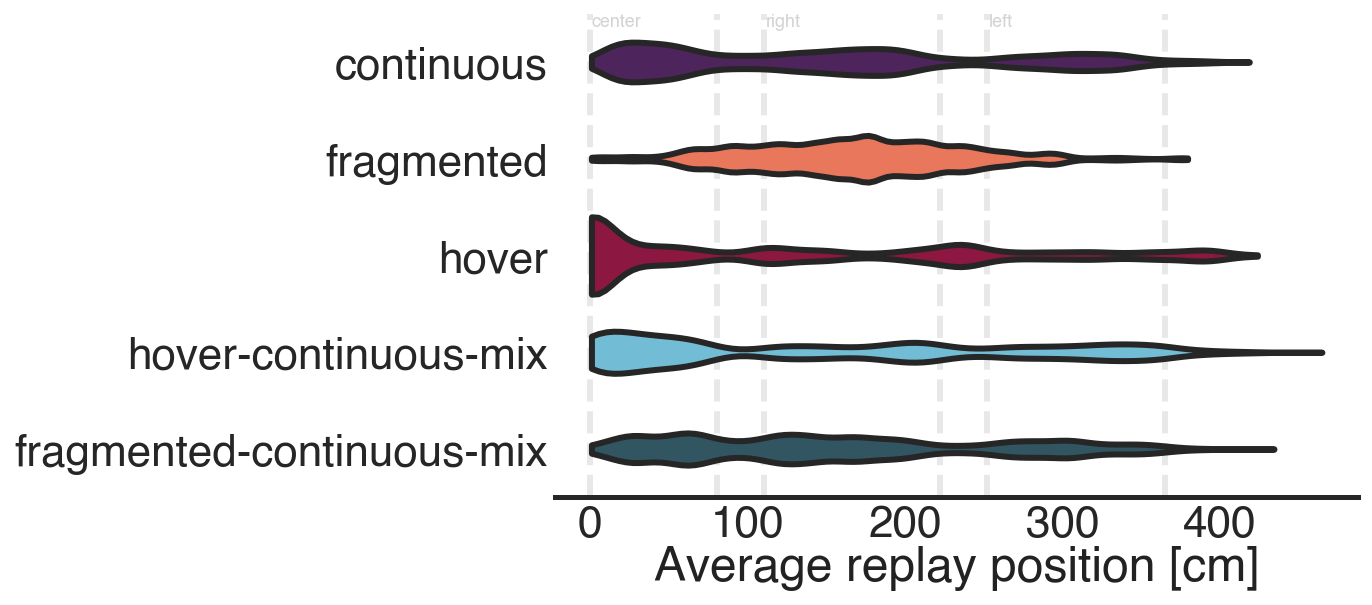

In [14]:
from src.visualization import plot_replay_linear_position

plt.figure()
plot_replay_linear_position(replay_info)

plt.figure()
plot_replay_linear_position(replay_info, kind='violin', bw=0.1, inner=None)

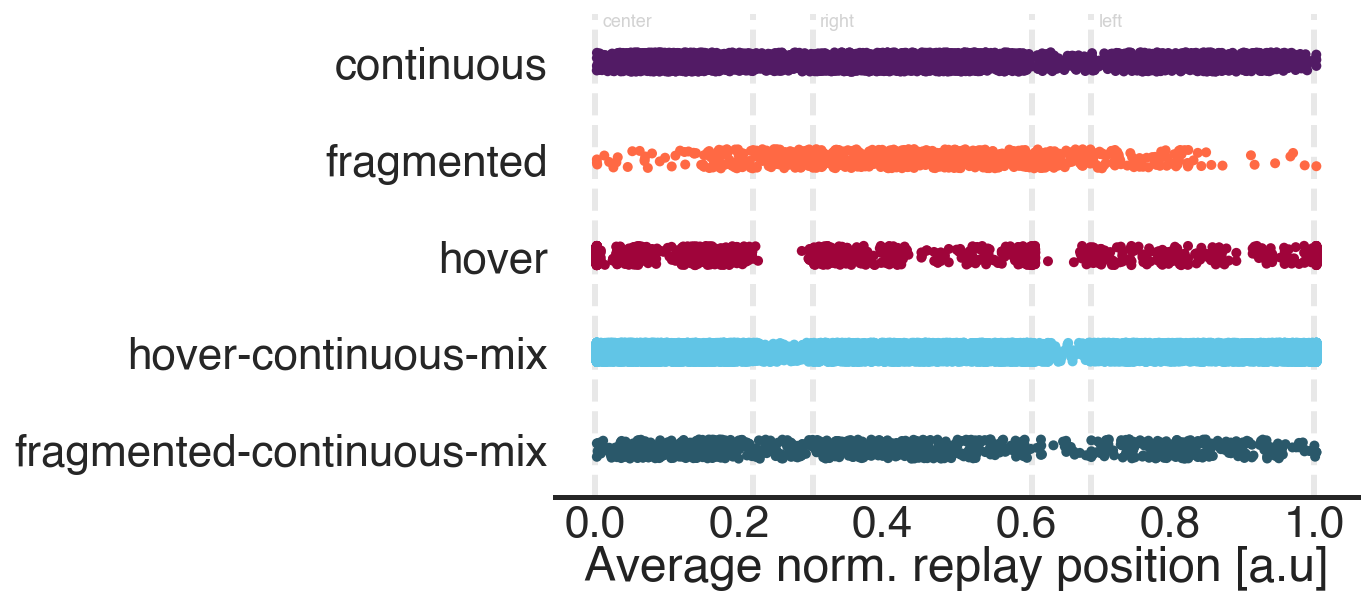

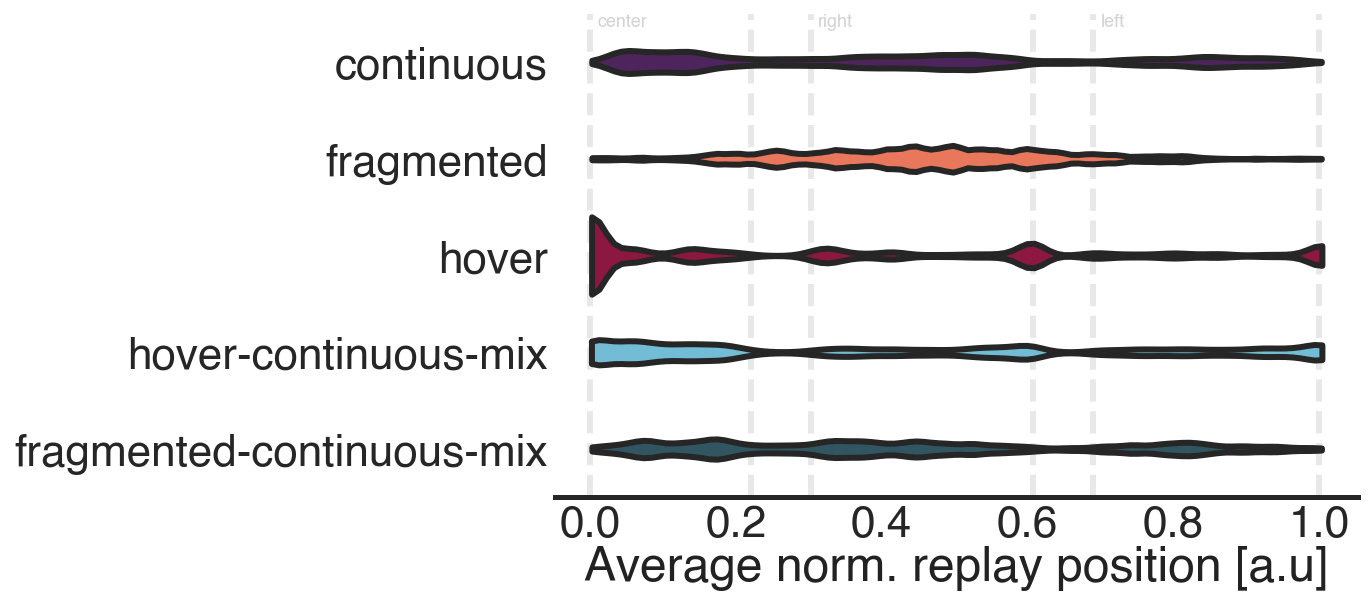

In [15]:
from src.visualization import plot_replay_norm_linear_position

plt.figure()
plot_replay_norm_linear_position(replay_info)

plt.figure()
plot_replay_norm_linear_position(replay_info, kind='violin', bw=0.05, inner=None)

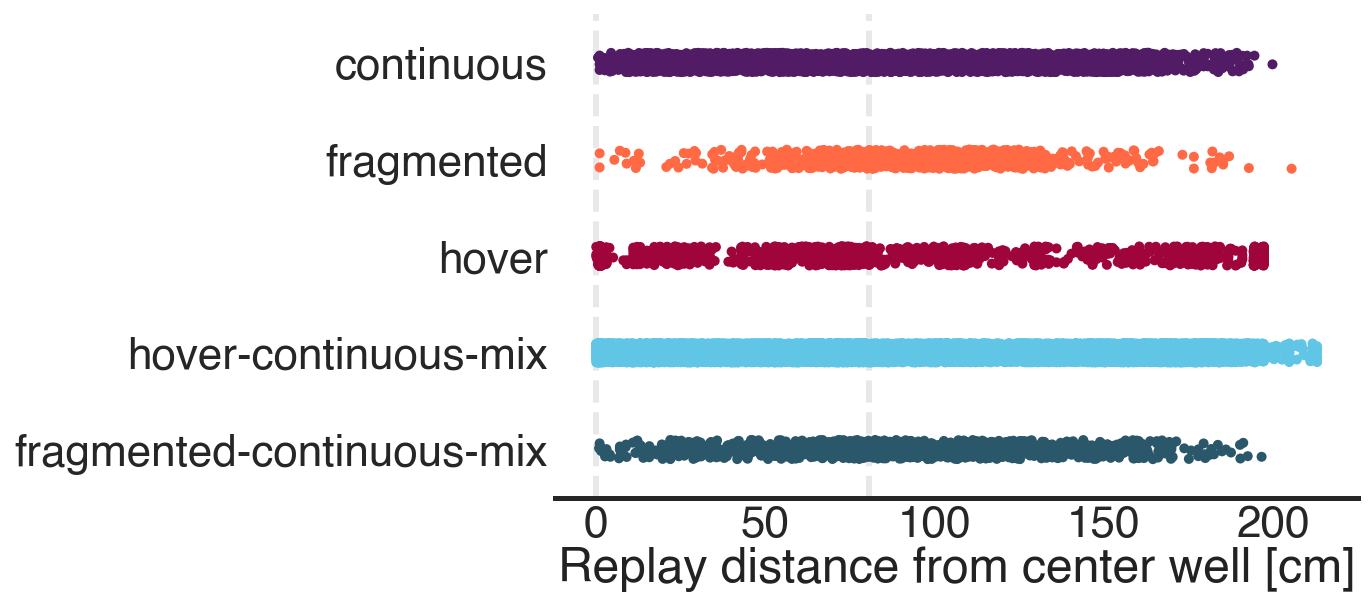

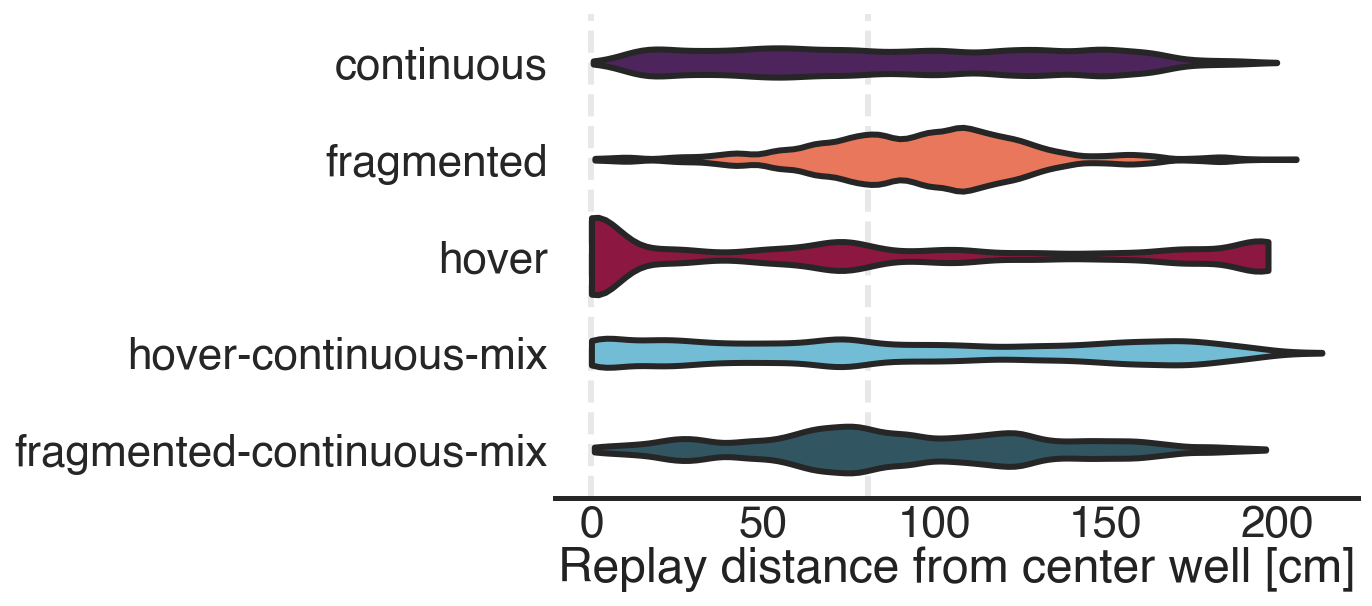

In [16]:
from src.visualization import plot_replay_distance_from_center_well

plt.figure()
plot_replay_distance_from_center_well(replay_info)

plt.figure()
plot_replay_distance_from_center_well(replay_info, kind='violin', bw=0.1, inner=None)
save_figure('replay_distance_from_center_well')

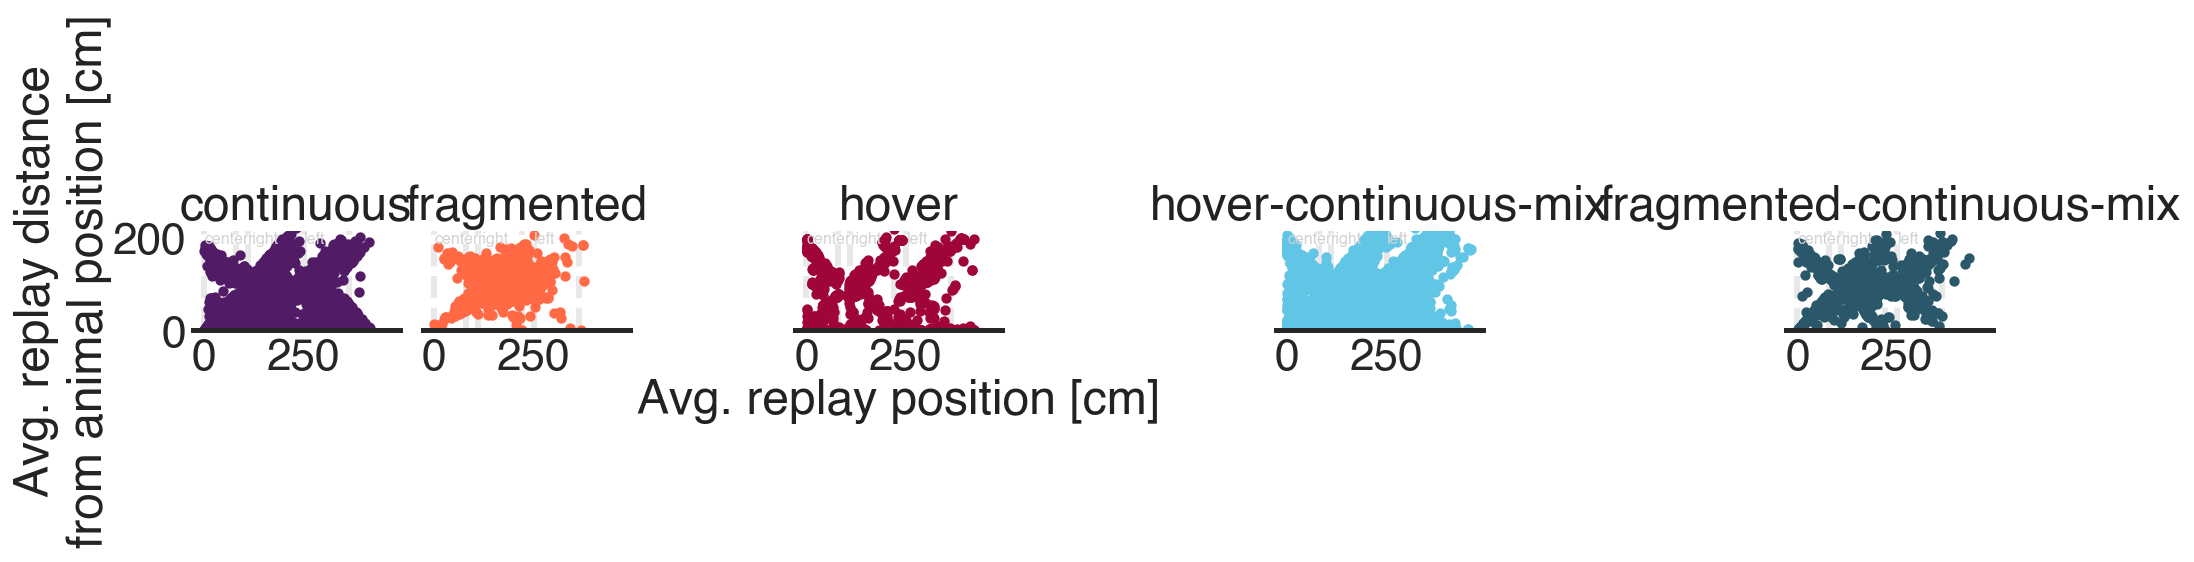

In [17]:
from src.visualization import plot_replay_linear_position_vs_distance_from_actual_position

plot_replay_linear_position_vs_distance_from_actual_position(replay_info)

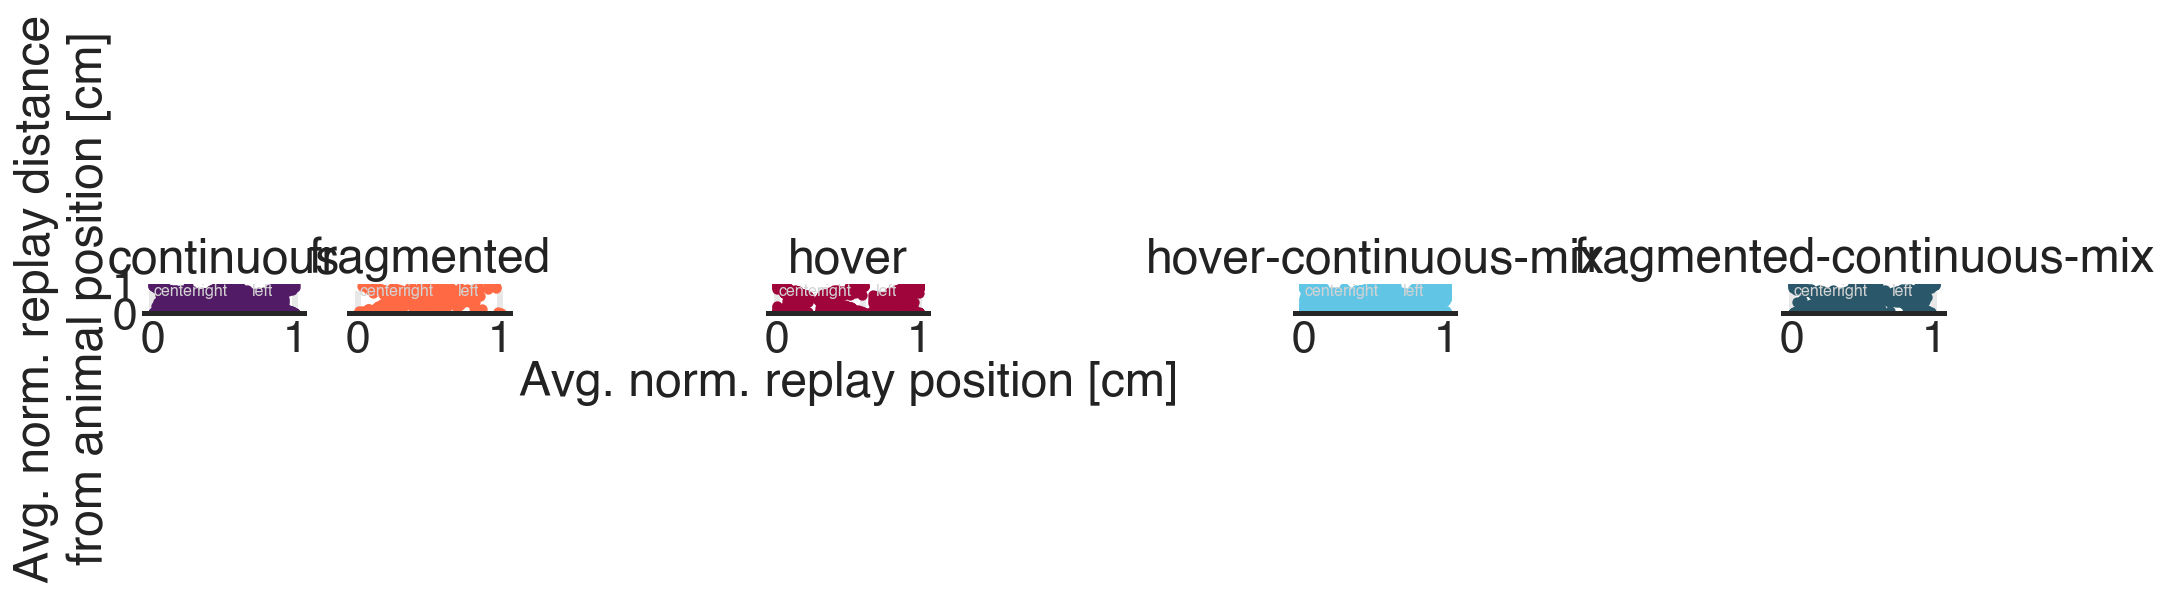

In [18]:
from src.visualization import plot_norm_replay_linear_position_vs_distance_from_actual_position

plot_norm_replay_linear_position_vs_distance_from_actual_position(replay_info)

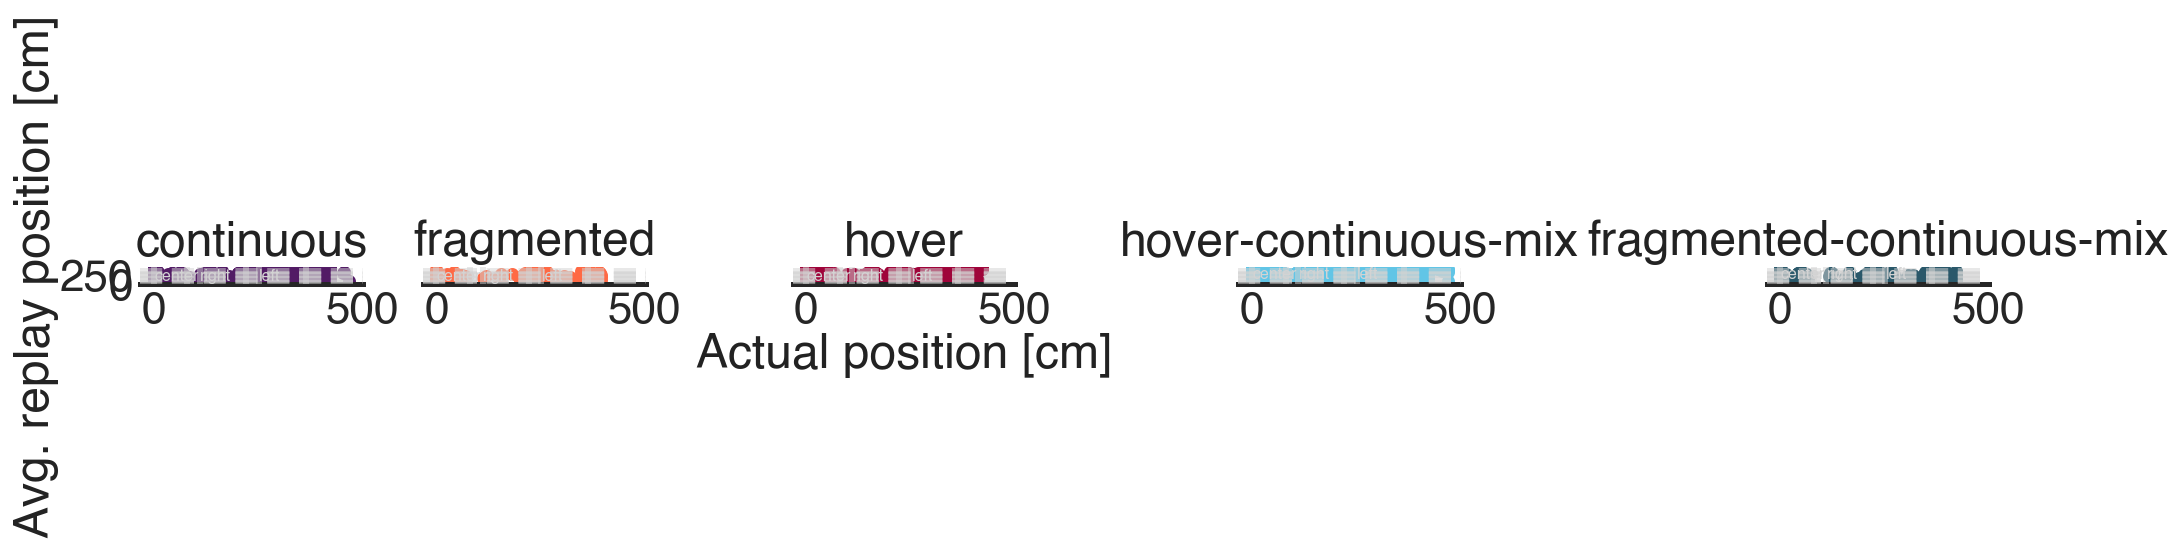

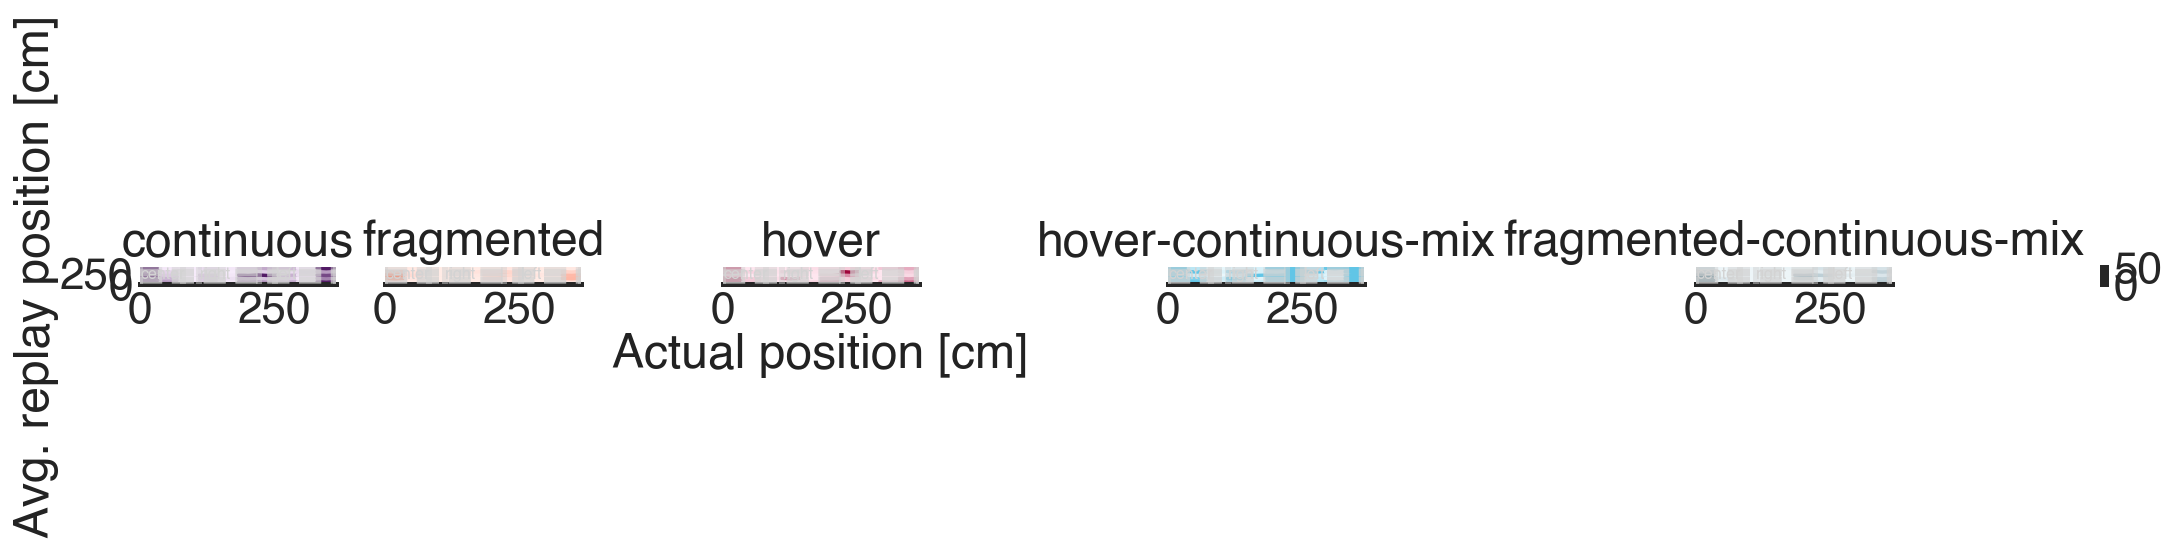

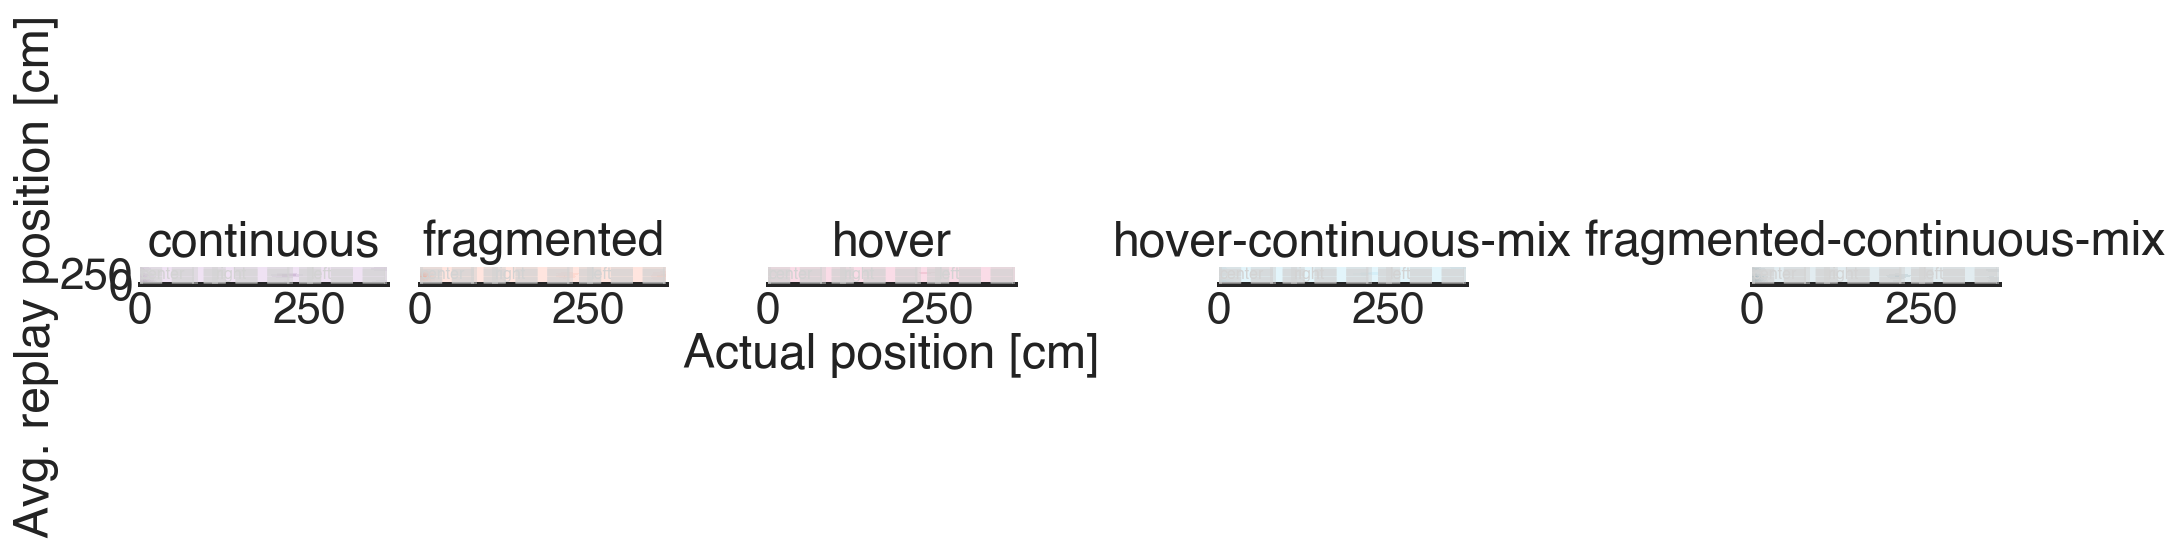

In [19]:
from src.visualization import plot_actual_position_vs_replay_position

plot_actual_position_vs_replay_position(replay_info)
plot_actual_position_vs_replay_position(replay_info, kind='hexbin', vmax=50)
plot_actual_position_vs_replay_position(replay_info, kind='kdeplot')

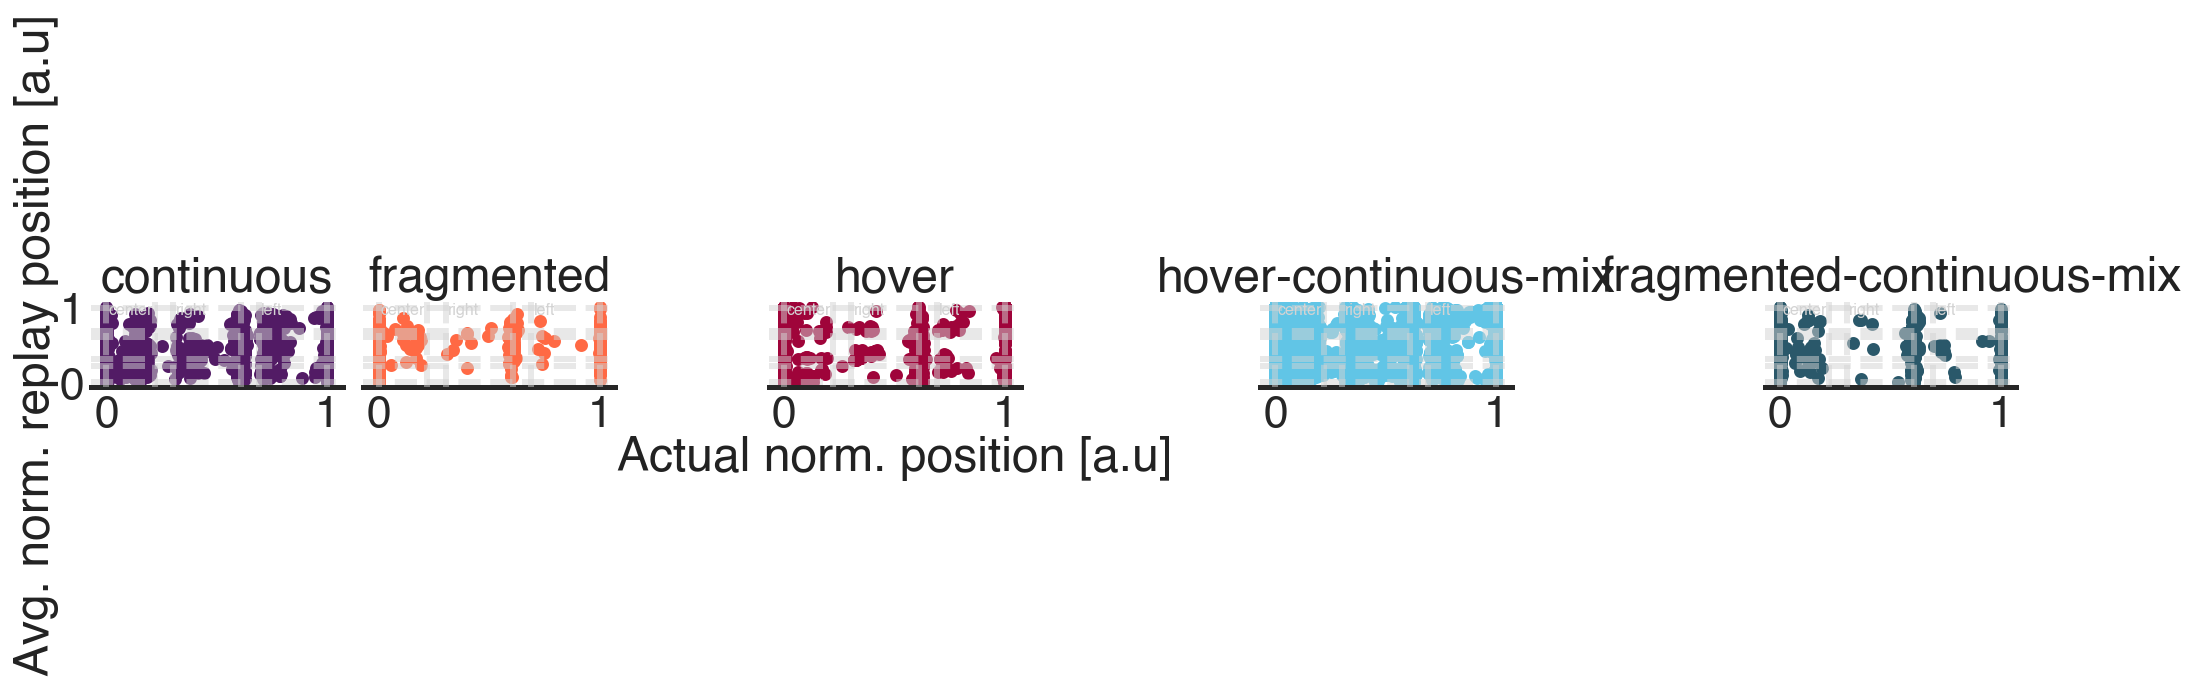

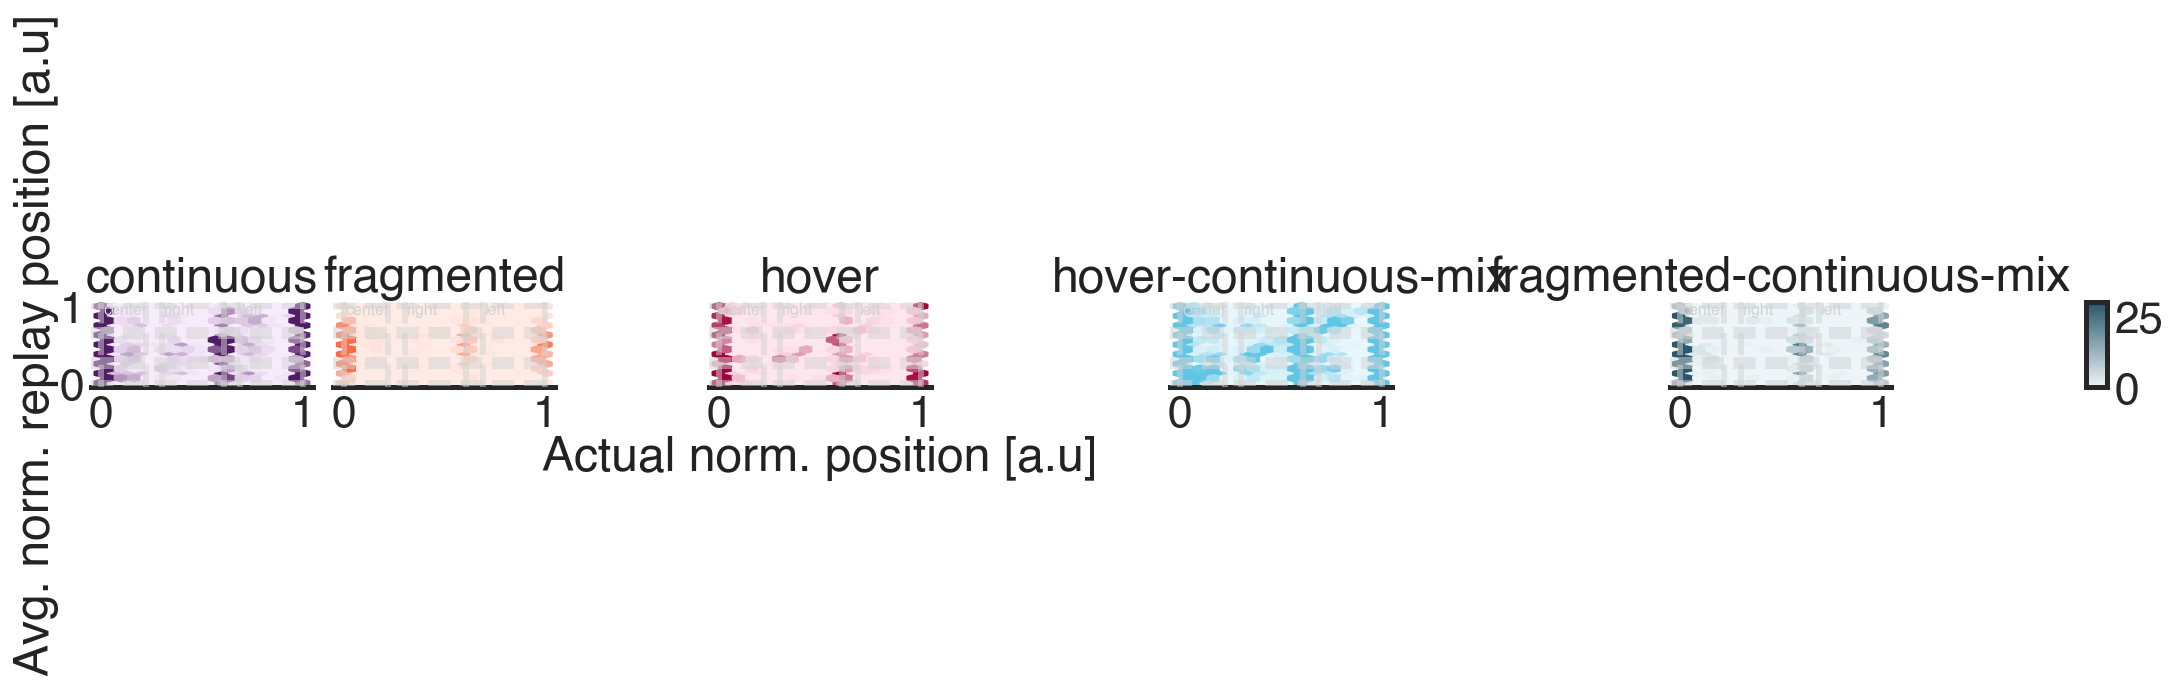

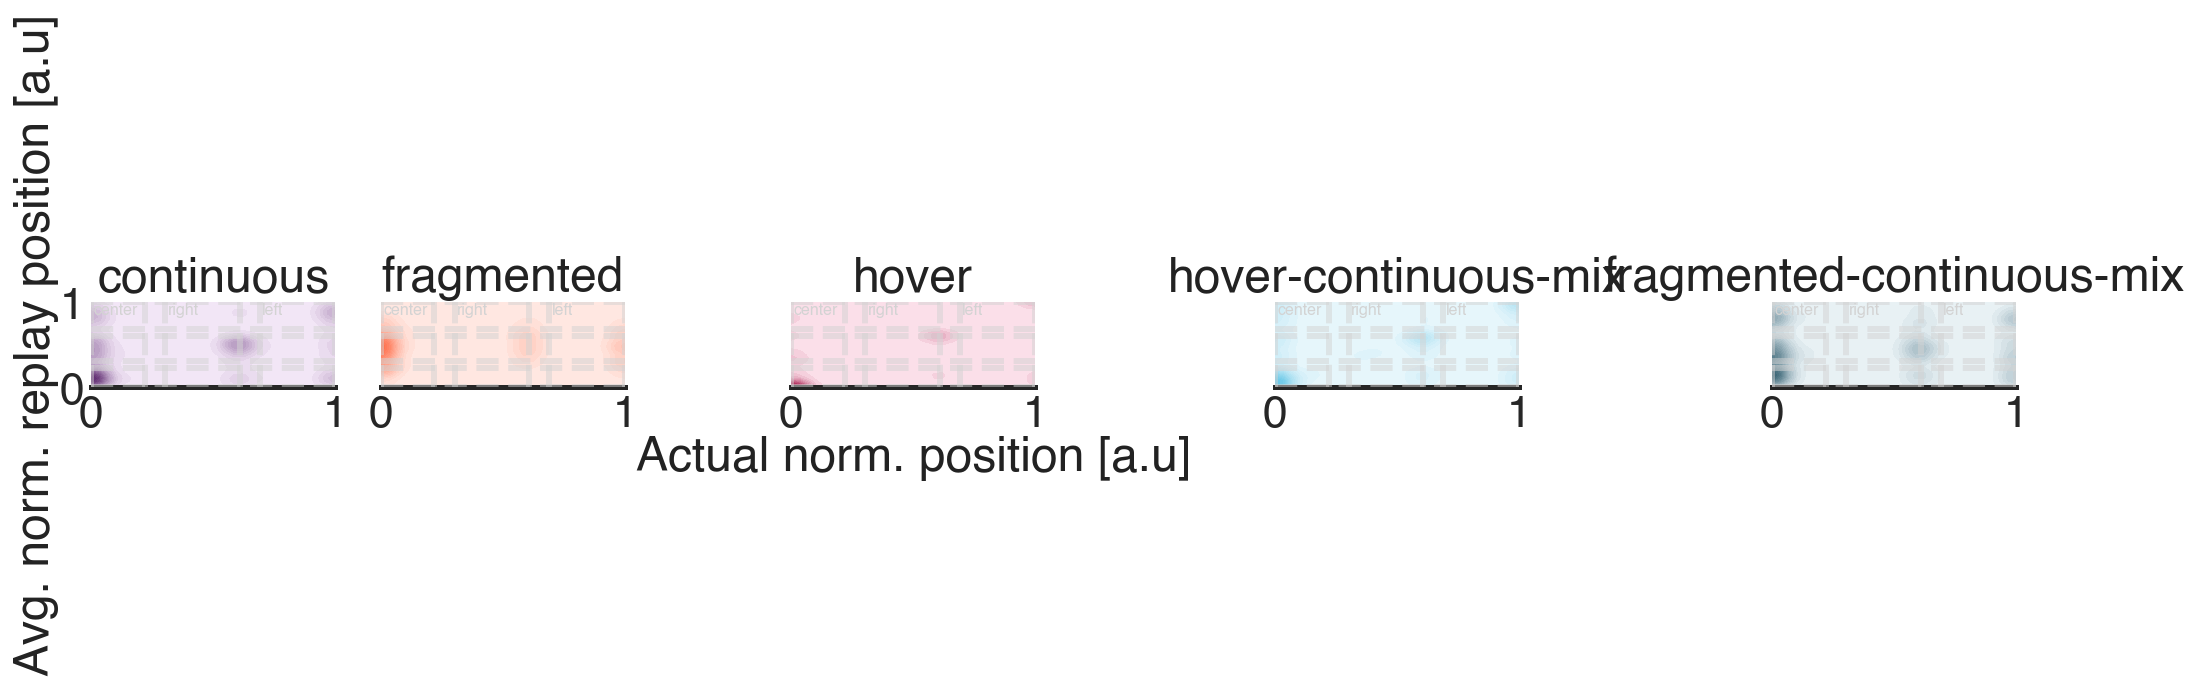

In [20]:
from src.visualization import plot_norm_actual_position_vs_replay_position

plot_norm_actual_position_vs_replay_position(replay_info)
plot_norm_actual_position_vs_replay_position(replay_info, kind='hexbin')
plot_norm_actual_position_vs_replay_position(replay_info, kind='kdeplot')

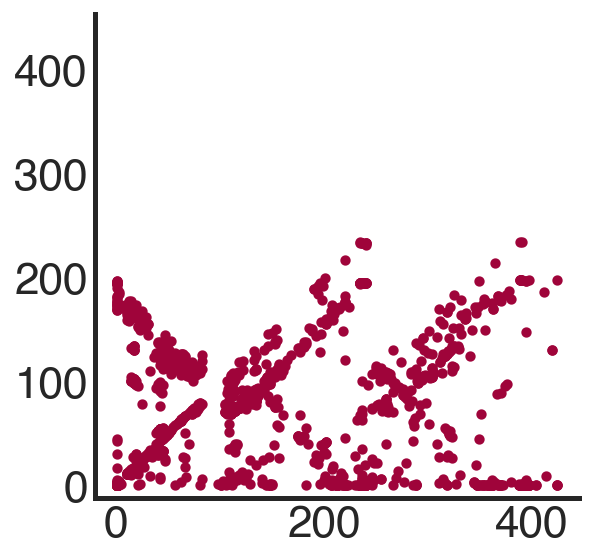

In [50]:
hovers = replay_info.loc[replay_info.hover]

plt.scatter(replay_info.hover_replay_linear_position.values,
            replay_info.hover_replay_distance_from_actual_position.values,
            c=STATE_COLORS['hover'], s=10)
plt.axis('square')
sns.despine()

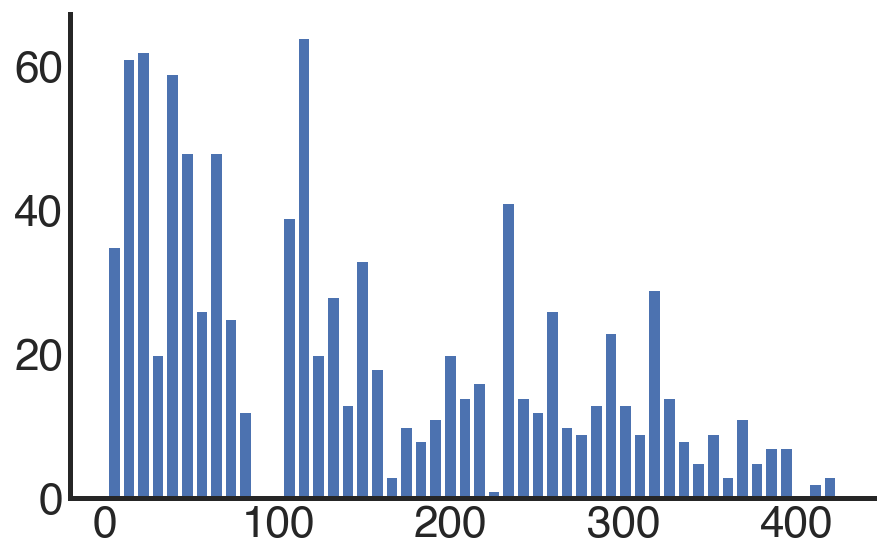

In [71]:
plt.hist(replay_info.loc[replay_info.hover_replay_distance_from_actual_position > 5].hover_replay_linear_position.values,
         bins=50)
sns.despine()

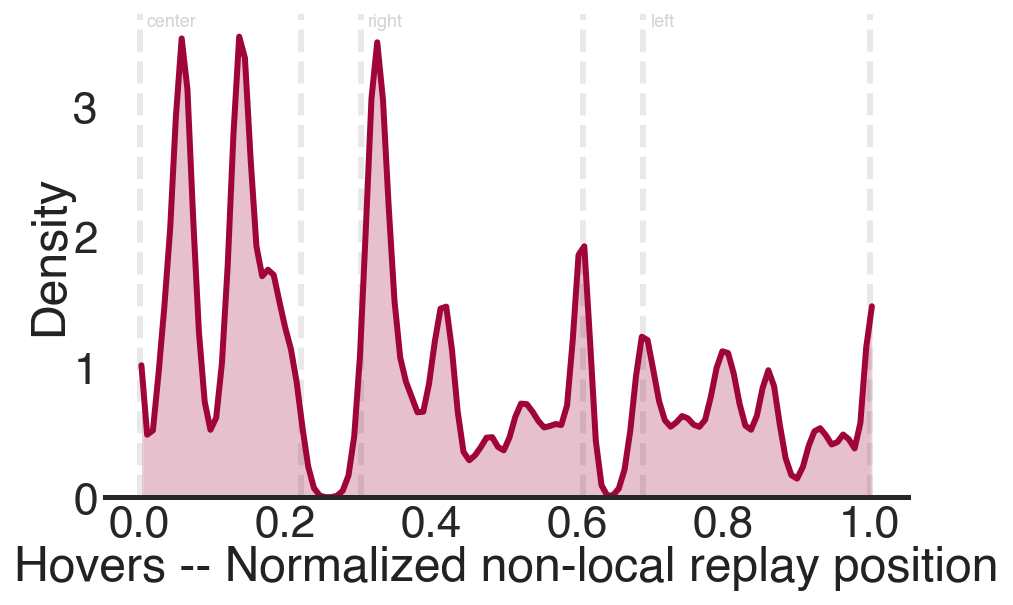

In [95]:
from src.visualization import plot_linear_position_markers

sns.kdeplot(norm_non_local_hover, bw=0.01, cut=0, shade=True,
            facecolor=STATE_COLORS['hover'], color=STATE_COLORS['hover'], legend=False)
plt.xlabel('Hovers -- Normalized non-local replay position')
plt.ylabel('Density')
plot_linear_position_markers(replay_info, is_normalized=True, jitter=0.01)
sns.despine(left=True)
save_figure('hovers_normalized_non_local_replay_position')

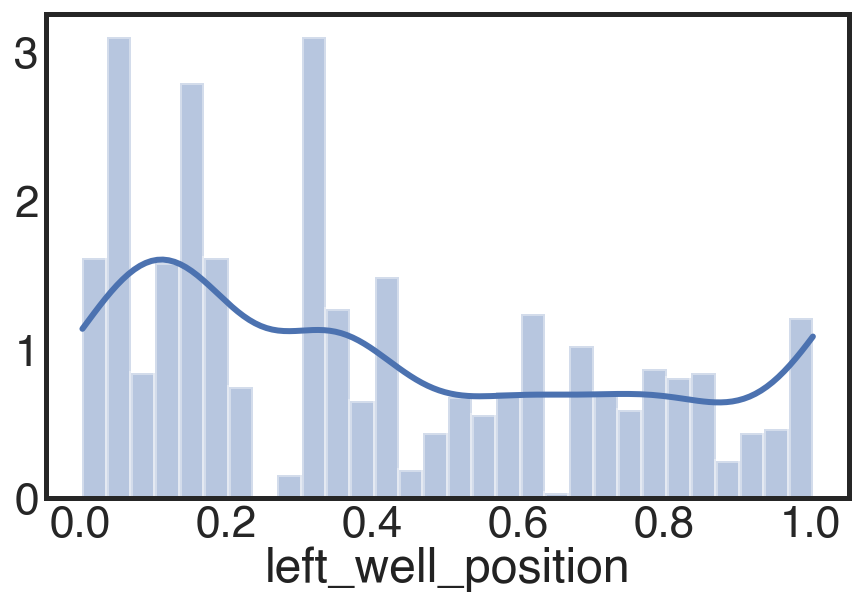

In [69]:
norm_non_local_hover = (
    replay_info.loc[replay_info.hover_replay_distance_from_actual_position > 5].hover_replay_linear_position.values /
    replay_info.loc[replay_info.hover_replay_distance_from_actual_position > 5].left_well_position)

sns.distplot(norm_non_local_hover, kde_kws=dict(cut=0), bins=30, norm_hist=True)


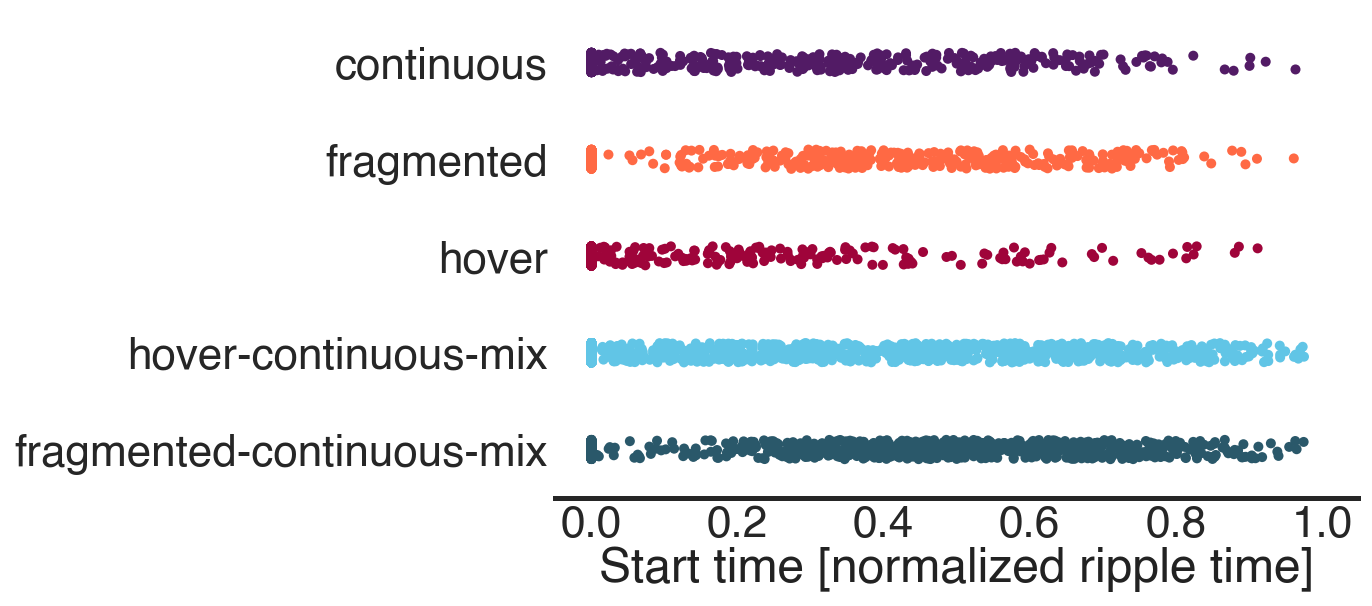

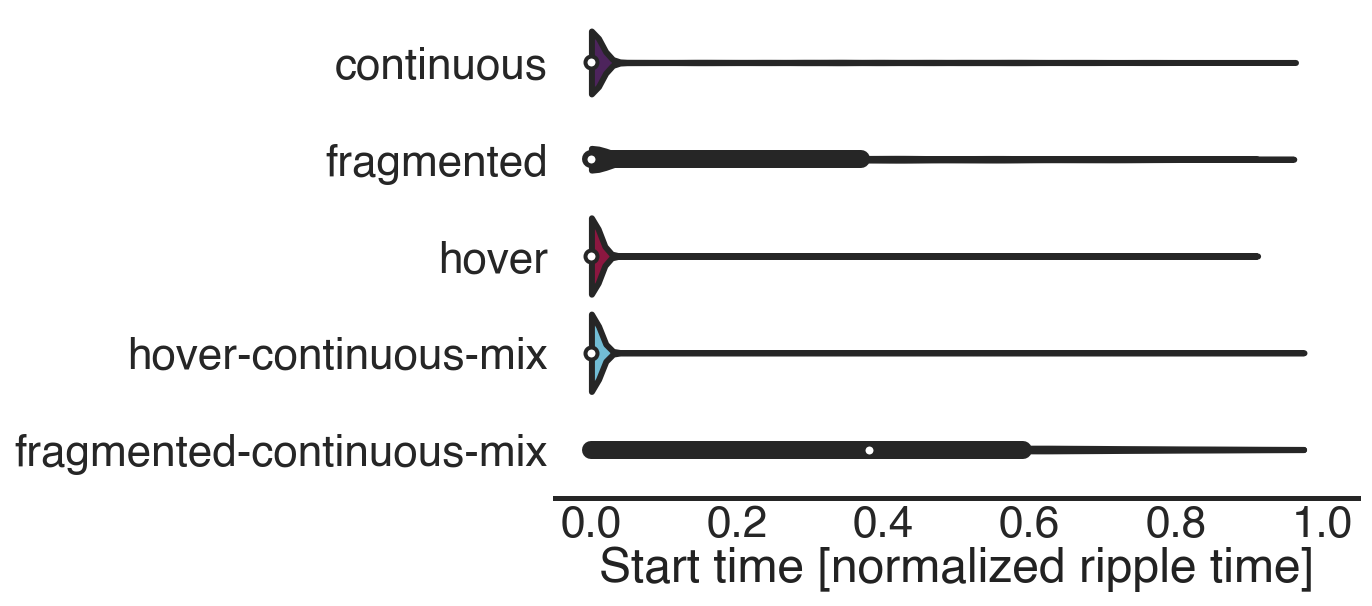

In [21]:
from src.visualization import plot_replay_time


plt.figure()
plot_replay_time(replay_info)

plt.figure()
plot_replay_time(replay_info, kind='violin', bw=0.1)
save_figure('start_time')

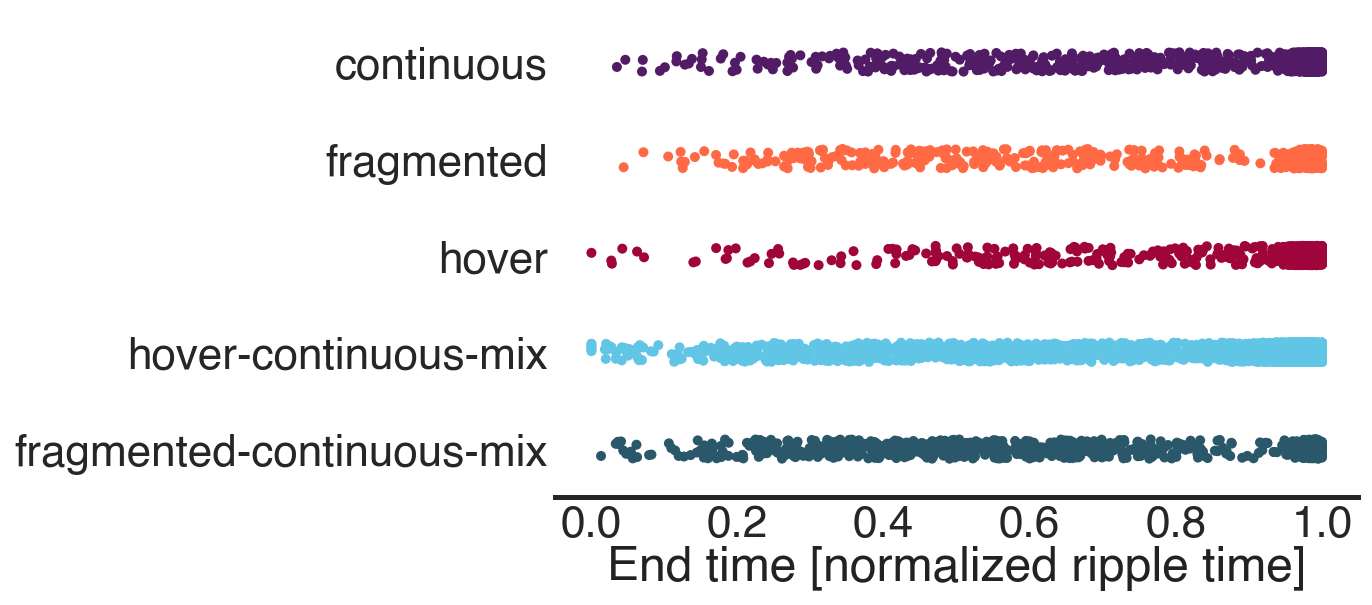

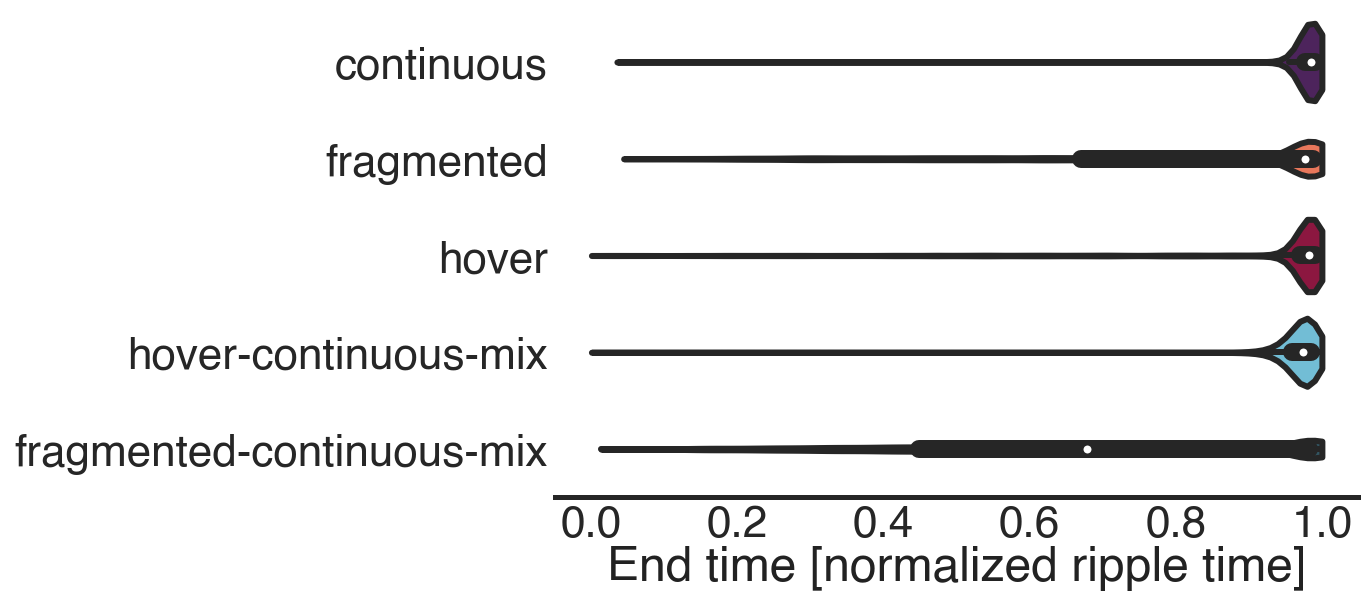

In [22]:
from src.visualization import plot_replay_time


plt.figure()
plot_replay_time(replay_info, is_min=False)

plt.figure()
plot_replay_time(replay_info, is_min=False, kind='violin', bw=0.1)
save_figure('end_time')

In [1]:
from src.visualization import plot_replay_speed


plt.figure()
plot_replay_speed(replay_info, kind='violin')
plt.gca().set_xscale('log')
plt.xlim((1E-4, 1E4))
save_figure('replay_speed')

plt.figure()
plot_replay_speed(replay_info, kind='violin')
plt.xlim((-0.001, 50));
save_figure('replay_speed2')

NameError: name 'plt' is not defined

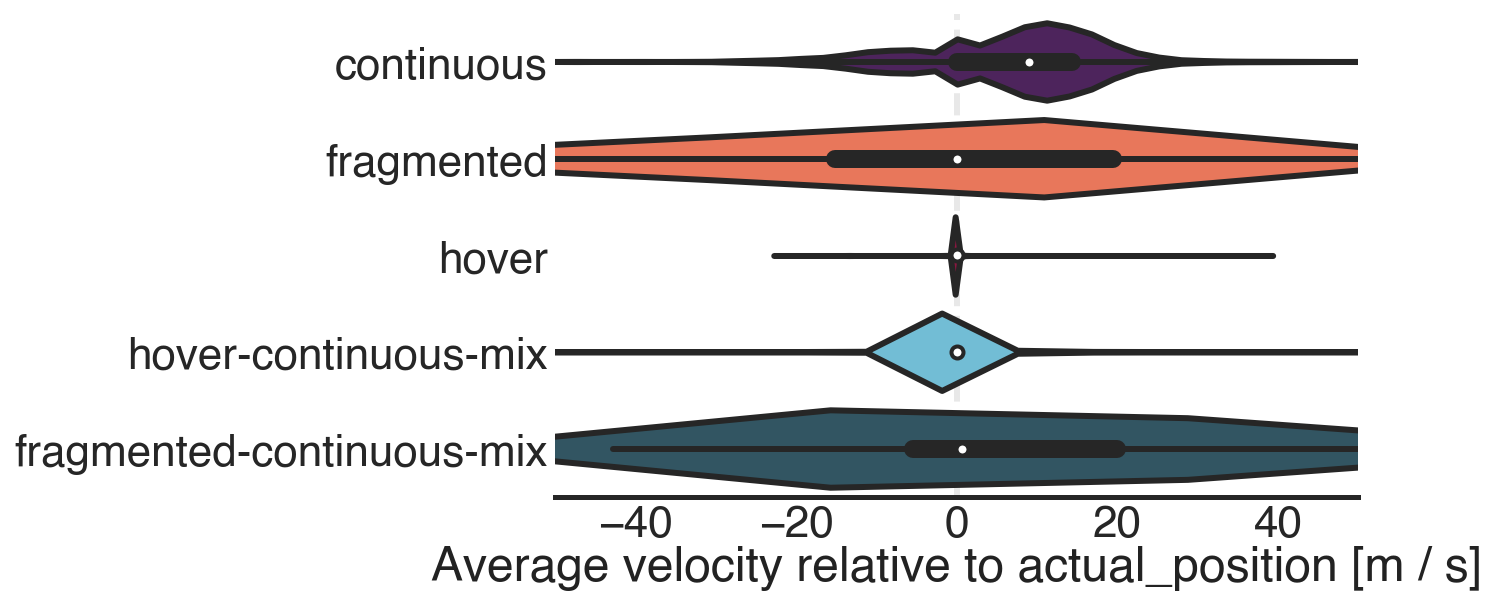

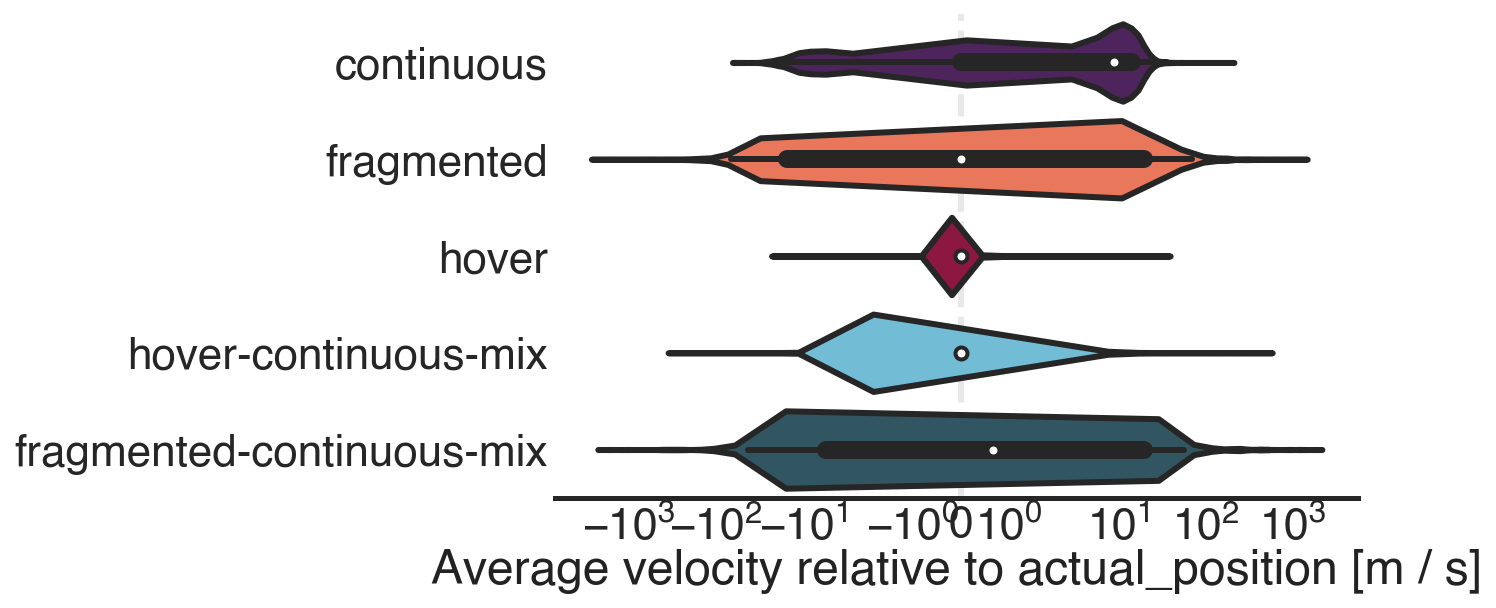

In [24]:
from src.visualization import plot_replay_velocity

plt.figure()
plot_replay_velocity(replay_info, relative_to='actual_position', bw=0.1)
plt.xlim((-50, 50))


plt.figure()
plot_replay_velocity(replay_info, relative_to='actual_position', bw=0.1)
plt.gca().set_xscale('symlog')
save_figure('replay_velocity_relative_to_animal')

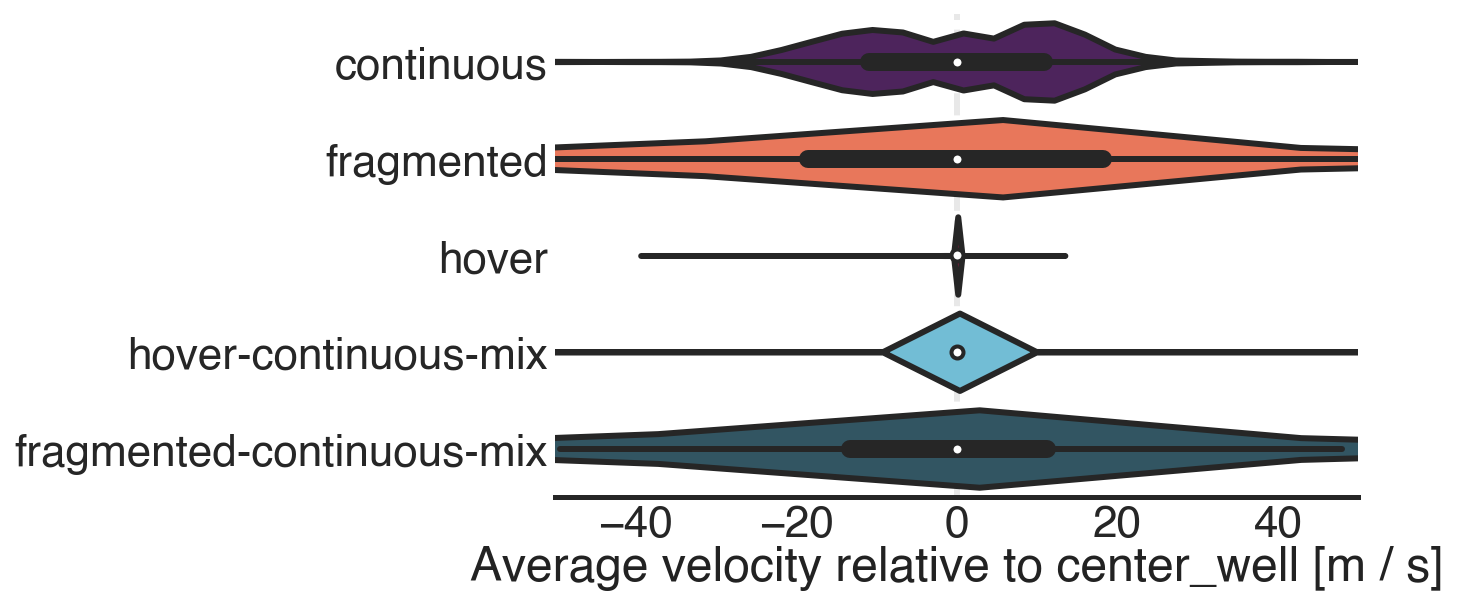

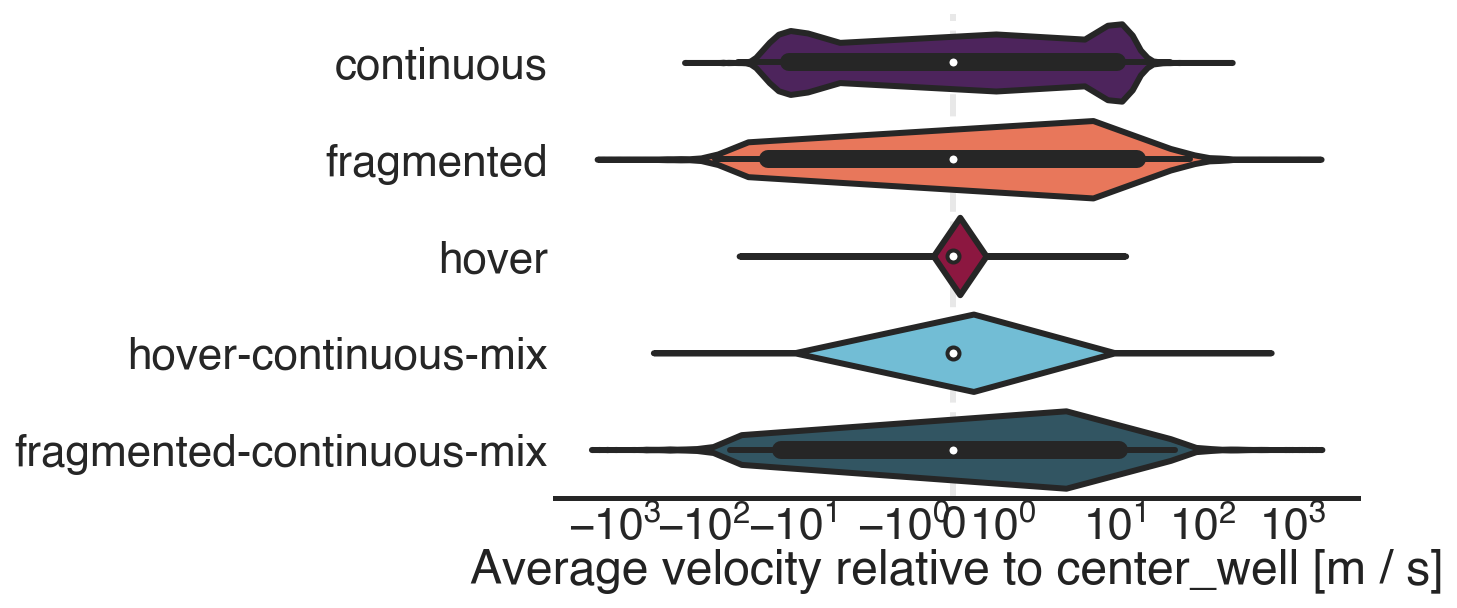

In [25]:
from src.visualization import plot_replay_velocity

plt.figure()
plot_replay_velocity(replay_info, relative_to='center_well', bw=0.1)
plt.xlim((-50, 50))

plt.figure()
plot_replay_velocity(replay_info, relative_to='center_well', bw=0.1)
plt.gca().set_xscale('symlog')
save_figure('replay_velocity_relative_to_center_well')

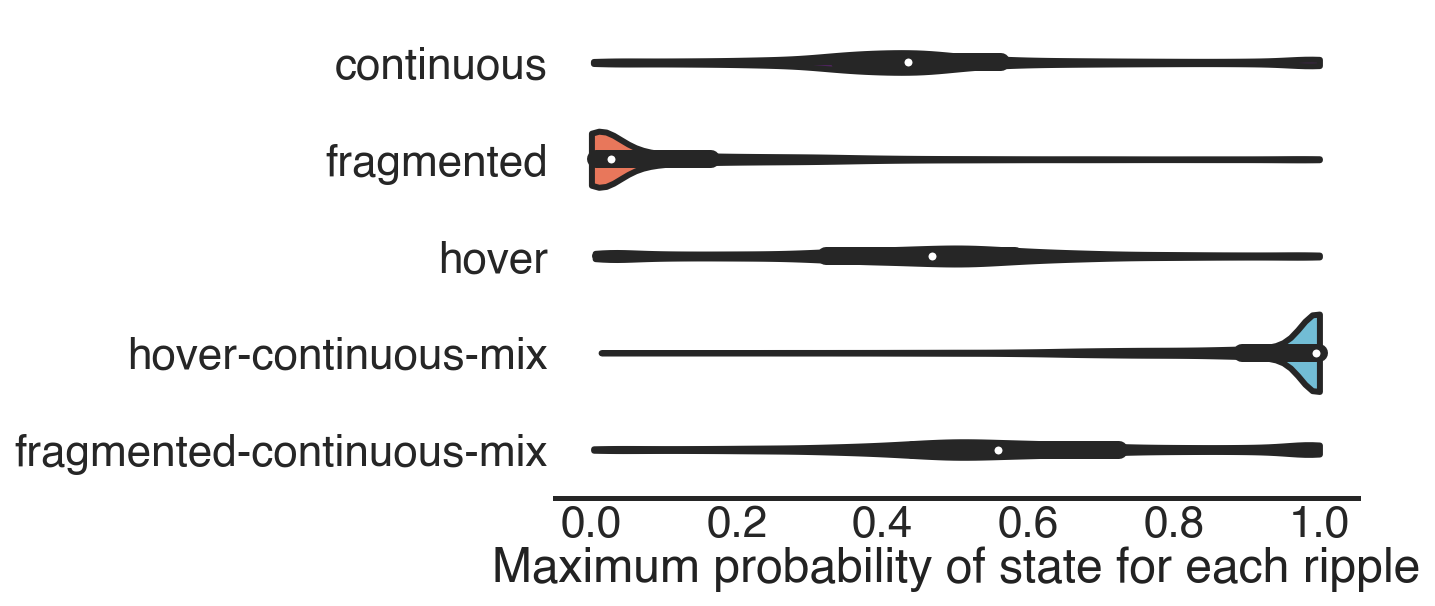

In [26]:
from src.visualization import plot_max_probability

plot_max_probability(replay_info, kind='violin')

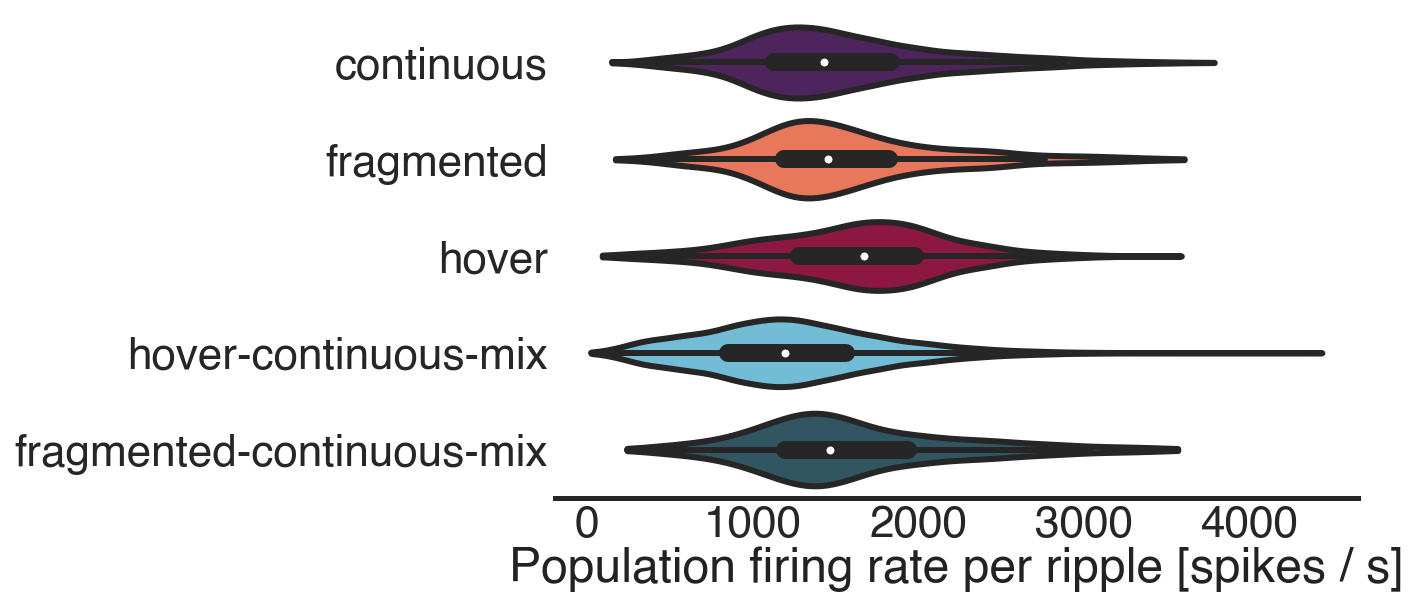

In [27]:
from src.visualization import plot_population_rate

plot_population_rate(replay_info)
save_figure('average_multiunit_rate')

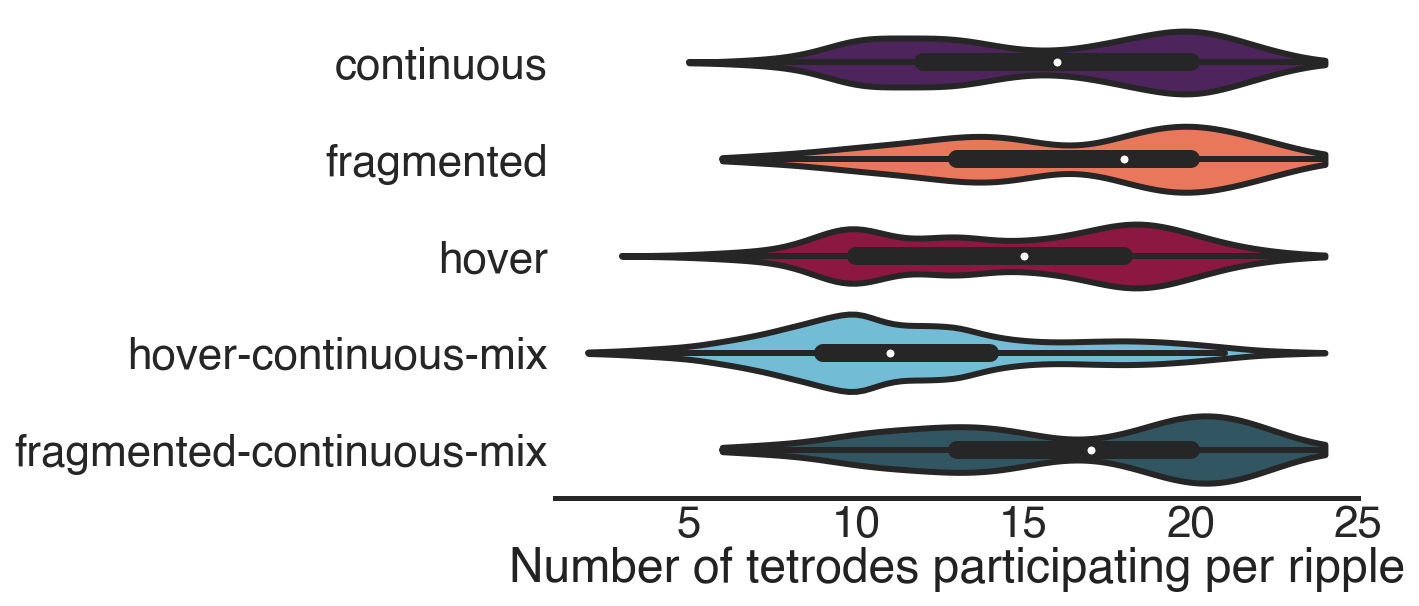

In [28]:
from src.visualization import plot_n_unique_spiking


plt.figure()
plot_n_unique_spiking(replay_info, kind='violin', data_type='tetrodes')
save_figure('n_unique_spiking')

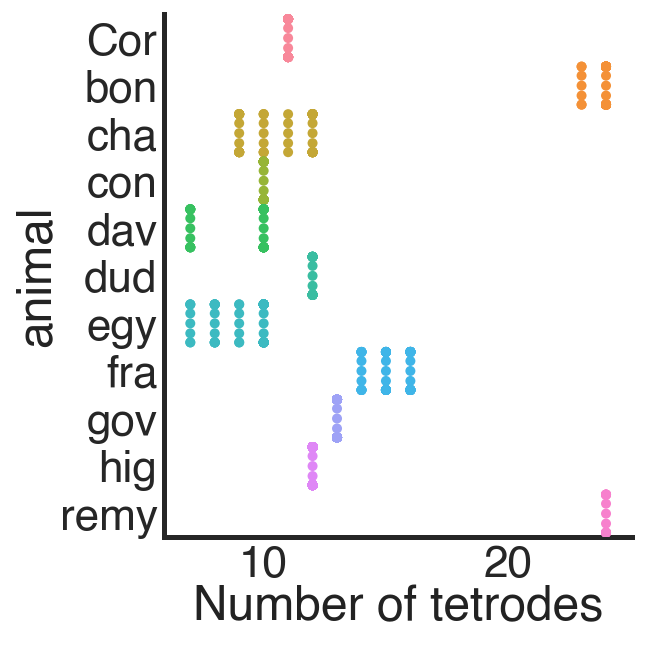

In [29]:
from loren_frank_data_processing import make_tetrode_dataframe, make_epochs_dataframe
from src.parameters import ANIMALS, _BRAIN_AREAS

epoch_info = make_epochs_dataframe(ANIMALS)
tetrode_info = make_tetrode_dataframe(ANIMALS)
is_brain_areas = (
        tetrode_info.area.astype(str).str.upper().isin(_BRAIN_AREAS))
n_tetrodes = (tetrode_info.loc[is_brain_areas]
              .groupby(['animal', 'day', 'epoch'])
              .tetrode_id
              .agg(len)
              .rename('n_tetrodes')
              .to_frame()
              .loc[epoch_info.index])
sns.catplot(x='n_tetrodes', y='animal', data=n_tetrodes.reset_index(), kind='swarm')
plt.xlabel('Number of tetrodes');
save_figure('n_tetrodes');